OrganRandomParameter::readXML: warning! parameter a_x_eq is defined in the xml, but not available in organ stem
Highest root depth (cm): -3.0
Deepest root depth (cm): -3.6770598548420734
Surface border coordinates: -1.8497692372762267 0.0 7.852770849782587 7.113580131270605
Plant wheelbase rectangle size (cm): 9.702540087058814 7.113580131270605
Wheelbase (cm²):  69.01979638615815
OrganRandomParameter::readXML: warning! parameter a_x_eq is defined in the xml, but not available in organ leaf
Seed::initialize: Plant 
Organism::simulate: from 0 to 30 days
Seed::initialize:Shootborne root type #5 was not defined, using tap root parameters instead
dx <= dxMin, dxMin set to dx/2
param_names ['radius', 'organType', 'creationTime', 'organType']
Number of extruded leafes' segments (should be higher then 0): 0
Leaf surface (cm²):  35.29846967833006
LAI:  0.5114252942857005
Number of leaves 4
Number of segments:  94
param_names ['radius', 'organType', 'creationTime', 'Light_Coefficient']
Number o

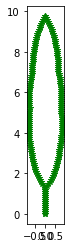

In [1]:
#source file:  tutorial/examples/python/example1e_plantShape.py
"""plant example

adapted from "example_plant_anim", "example10_nodalGrowth"
"CPlantBox_tutorial_FSPM2020.ipynb", "test_leafparameter"
We present here parameters specific for leaves and stems
 
"""

#    !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!    REACTIVER LES SEGSOBJ  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


# import sys
# sys.modules.clear()

import sys ;sys.path.append("../../.."); sys.path.append("../../../src/python_modules")
import numpy as np;

import plantbox as pb
import vtk_plot as vp

import importlib
importlib.reload(vp)
import matplotlib.pyplot as plt
from vtk_tools import *
import math
##parameters for example:
adaptSeed = True
adaptLeaf = True
adaptStem = True
leafRadial = True #radial or not
anim = False      #Allows the render
zoomLeafShape = True
export = False
getImage = True

##create plant:
plant = pb.Plant()
# Open plant and root parameter from a file
path = "../../../modelparameter/plant/" 
name = "example1e"
name = "wheat_bidouille"
# name = "wheat_uqr15_4vincent"
plant.readParameters(path + name + ".xml")
simtime = 30 #days simulated


#This parameter allows the user to either have a simple plant (False) model and the bearbones functionnalities of the notebbok
#If it is set to to True, it will pick the bellow plant model. This one is more complete then the above one. It the bottom one,
#you will have a root system. This root system will be used in the next code section to compute water fluxes in the xylem.
Rooting = True
Rooting = False
if Rooting:
    import sys; sys.path.append("../../.."); sys.path.append("../../../src/python_modules")
    from xylem_flux import XylemFluxPython  # Python hybrid solver
    from Leuning import Leuning
    import plantbox as pb
    import vtk_plot as vp
    import pandas as pd
    from matplotlib.ticker import MaxNLocator
    import numpy as np
    import matplotlib.pyplot as plt

    """ Parameters """
    kz = 4.32e-1  # axial conductivity [cm^3/day] 
    kr = 1.728e-4  # radial conductivity of roots [1/day]
    kr_stem = 1.e-20  # radial conductivity of stem  [1/day], set to almost 0
    gmax =  0.004 #  cm3/day radial conductivity of leaves = stomatal conductivity [1/day]
    p_a =  -1000  #static air water potential 
    simtime = 30 # [day] for task b
    k_soil = []
    plotResults = True
    saveResults = False

    t_init = 70
    t_end = 90

    # root system 
    plant = pb.MappedPlant() #pb.MappedRootSystem() #pb.MappedPlant()
    path = "../../../modelparameter/plant/" #"../../../modelparameter/rootsystem/" 
    name = "manyleaves" #"Anagallis_femina_Leitner_2010"  # Zea_mays_1_Leitner_2010
    plant.readParameters(path + name + ".xml")

    #load data
    df = pd.read_csv('../../../modelparameter/Selhausen_weather_data.txt', delimiter = "\t")

    """ soil """
#     min_ = np.array([-5, -5, -15])
#     max_ = np.array([9, 4, 0])
#     res_ = np.array([5, 5, 5])
#     plant.setRectangularGrid(pb.Vector3d(min_), pb.Vector3d(max_), pb.Vector3d(res_), True)  # cut and map segments
    #adds a container below the plant to stop de progression of the roots to go further than the perimeter
    plant.setGeometry(pb.SDF_PlantContainer(1.e6,1.e6,1.e6,True)) # length, width, height [-5.e5,5.e5] [-5.e5,5.e5] [0.,-1.e6]

#     plant.initialize()
#     plant.simulate(simtime, True)
    

    
#The "adapt" params allows you to overwrite the imported data from the above models.
if adaptSeed:
    srp = pb.SeedRandomParameter(plant)  # with default values
    srp.firstTil = 0  # [day] first emergence of a tiler
    srp.delayTil = 0  # [day] delay between the emergence of tilers
    srp.maxTil = 0 # [-] number of tillers 
    plant.setOrganRandomParameter(srp)
    

if adaptStem:
    for p in plant.getOrganRandomParameter(pb.stem):
        if (p.subType > 0): # can be changed according to the suptypes of the plant
            p.nodalGrowth = 1   #< whether to implement the internodal growth 
            p.delayLat = 1  #< delay between stem creation and start of nodal growth [day]
            p.delayNG = 10   #< delay between lateral creation and growth [day]
#             p.lmax = 20
#             p.lb = 12
#             p.dx = 1
            #p.tropismAge = 10 #< only used if tropsimT = 6
            plant.setOrganRandomParameter(p)
            
if adaptLeaf:
    for p in plant.getOrganRandomParameter(pb.leaf):
    
                #p.lmax - p.la - p.lb = leafMid = center of radial circle
        if (p.subType >= 2): #leaf subtypes start at 2
            p.lb =  1 # length of leaf stem
            p.la,  p.lmax = 3.5, 8.5
            p.areaMax = 10  # cm2, area reached when length = lmax
            N = 100  # N is rather high for testing
            if leafRadial:
            
                #LongLeaf:
                p.lb =  1 # length of leaf stem
                p.ln = 0
                p.la,  p.lmax = 3.5, 8.5
                p.areaMax = 10  # cm2, area reached when length = lmax
                N = 100  # N is rather high for testing
                phi = np.array([-90, -45, 0., 45, 90]) / 180. * np.pi
                l = np.array([3, 2.2, 1.7, 2, 3.5]) #distance from leaf center
                
                
                #Maple leaf:
#                 p.lb =  1 # length of leaf stem
#                 N = 100  # N is rather high for testing
#                 p.areaMax = 50 
#                 p.la,  p.lmax = 5, 11
#                 phi = np.array([-90, -45, 0., 45,67.5,70, 90]) / 180. * np.pi
#                 l = np.array([2, 2, 2, 4,1,1, 4]) #distance from leaf center
                
                #Round leaf:
#                 p.lb =  1 # length of leaf stem
#                 N = 100  # N is rather high for testing
#                 p.la,  p.lmax = 5, 11
#                 p.areaMax = 3.145*(((p.lmax-p.la - p.lb)/2)**2)
#                 phi = np.array([-90, -45, 0., 45,67.5,70, 90]) / 180. * np.pi
#                 l_ = (p.lmax - p.lb - p.la)/2
#                 l = np.array([l_ for x_i in range(len(phi))]) #([2, 2, 2, 4,1,1, 4]) #distance from leaf center
                
                #flower-shaped leaf:
#                 p.lb =  1 # length of leaf stem
#                 N = 100  # N is rather high for testing
#                 p.areaMax = 100 
#                 p.la, p.lb, p.lmax = 5, 1, 11
#                 phi = np.array([-90., -67.5, -45, -22.5, 0, 22.5, 45, 67.5, 90]) / 180. * np.pi
#                 l = np.array([5., 1, 5, 1, 5, 1, 5, 1, 5])
                
                p.createLeafRadialGeometry(phi, l, N)
                
            else:
                p.lb =  2 # length of leaf stem
                p.la,  p.lmax = 3.5, 8.5
                p.areaMax = 10  # cm2, area reached when length = lmax
                N = 100  # N is rather high for testing  #Semble non-fonctionnel
                y = np.array([-3, -3 * 0.7, 0., 3.5 * 0.7, 3.5])
                l = np.array([0., 2.2 * 0.7, 1.7, 1.8 * 0.7, 0.])
                p.createLeafGeometry(y, l, N)     
                
                
            p.tropismT = 6 # 6: Anti-gravitropism to gravitropism
            #p.tropismN = 5
            #p.tropismS = 0.1
            p.tropismAge = 10 #< age at which tropism switch occures, only used if p.tropismT = 6
            plant.setOrganRandomParameter(p)


for p in plant.getOrganRandomParameter(pb.leaf):
    if (p.subType >= 2):
        #print(p) #permet de print tous les paramètres de la feuille   
        plant.initialize()

        
        
      
        

if anim:
    dt = 1
    N_ = 50
    min_ = np.array([0, -20, 0])/2
    max_ = np.array([20, 20, 30.])/2
    anim = vp.AnimateRoots(plant)
    anim.min = min_
    anim.max = max_
    anim.res = [1, 1, 1]
    #anim.file = "results/example_plant"
    #anim.avi_name = "results/example_"
    anim.plant = True
    anim.start()
    for i in range(0, N_):
        plant.simulate(dt, False)
        anim.root_name = "subType"
        anim.update()

if getImage:
    # Simulate
    if not anim:
        plant.simulate(simtime, True)
#         soil_index = lambda x,y,z : max(int(np.floor(-z)),-1) #abovegroud nodes get index -1
#         plant.setSoilGrid(soil_index)
        
        
        #This section will go through the differents segments of the plant and track organs' height and tell if the organ is not at the 
        #right height. It will also return the depth of the deepest root and the highest one.
        orgs_root = plant.getOrgans(2)
        minZ = -1000
        maxZ = 0
        for org in orgs_root:
            numnodes = org.getNumberOfNodes()
            n_ = 0
            while n_ < numnodes:
                nd = org.getNode(n_)
                n_ += 1
                if nd.z > minZ:
                    minZ = nd.z
                if nd.z < maxZ:
                    maxZ = nd.z
                if nd.z > 0:
                    print("root too high")
                    raise Exception
        print("Highest root depth (cm):", minZ)  
        print("Deepest root depth (cm):", maxZ)
        
        orgs_stem = plant.getOrgans(3)
        minX = 1000
        maxX = -1000
        minY = 1000
        maxY = -1000
        for org in orgs_stem:
            numnodes = org.getNumberOfNodes()
            n_ = 0
            while n_ < numnodes:
                nd = org.getNode(n_)
                n_ += 1    
                if nd.x > maxX:
                    maxX = nd.x
                if nd.x < minX:
                    minX = nd.x
                if nd.y > maxY:
                    maxY = nd.y
                if nd.y < minY:
                    minY = nd.y
        orgs_leaf = plant.getOrgans(4)
        for org in orgs_leaf:
            numnodes = org.getNumberOfNodes()
            n_ = 0
            while n_ < numnodes:
                nd = org.getNode(n_)
                n_ += 1
                if nd.z < 0:
                    print("leaf too low")
#                     raise Exception
                if nd.x > maxX:
                    maxX = nd.x
                if nd.x < minX:
                    minX = nd.x
                if nd.y > maxY:
                    maxY = nd.y
                if nd.y < minY:
                    minY = nd.y
        print("Surface border coordinates:", minX, minY, maxX, maxY)
        print("Plant wheelbase rectangle size (cm):", (abs(maxX)+abs(minX)), (abs(maxY)+abs(minY)))
        wheelbase = (abs(maxY)+abs(minY)) * (abs(maxX)+abs(minX))
        print("Wheelbase (cm²): ", wheelbase)  #This Wheelbase will be used in the below paragraph to compute the LAI

        
    
    #Plotting of the plant and possible creation of ".obj" files for further uses.
    
#     vp.plot_plant(plant, "organType") #Default function
    outputDirectory = "output"  #This is the output directory in which ".obj" files will be stored at.
    NormalsZValue= []  #Stores the Z value of the normals of the different leaves segments.
    LeafSurfaceList = [] #each array of this list contains the surface of each quadrilateral of each segments of each leaf.
    
    #The below plot_plant is loaded with all the parameters needed to retrieve data from the plant.
    vp.plot_plant(plant, "organType", render = False, #Base function parameter, it allows the function to run without creating a window
                  printout = True,                    #Main toggle to activate the creation of the data of this notebook
                  outputDirectory = outputDirectory,  #Sets the output directory
                  timestamp = False,                  #Sets if the ".obj" created have to be copied and stored
                  sim_name = "",                      #If blank, does nothing. If filled, will create a file grouping simulation with the same 
                  GraphicalAccuracy = True,           #If left to False, the render will not work correctly with "printout" set to true.
                  NormalsZValue = NormalsZValue,      #Return the Z values of the normals of each leaf segments
                  LeafSurfaceList = LeafSurfaceList,  #Returns the surface of each quadrilateral of each segment of each leaf
                  Thickness= False)                   #Creates thick leaves. Requires "output" to be True
    #Value verification
#     print("NormalsZValue",len(NormalsZValue), NormalsZValue) #for this line to work, it is needed to leave "printout" to true.
#     print(LeafSurfaceList)
    #Simple sum of the surfaces to compute the LAI
    SurfaceLeaf = 0
    for i in LeafSurfaceList:
        for j in i:
            SurfaceLeaf = SurfaceLeaf + j
    LAI = SurfaceLeaf / wheelbase
    print("Leaf surface (cm²): ", SurfaceLeaf)
    print("LAI: ", LAI)
    
            
    
    #Oeuf de Pâques:
#     vp.plot_plant(plant, "organType", render = False, printout = True, sim_name = "Oeuf", date = "Pâques", outputDirectory = outputDirectory)
    
    #Creates the lists needed for further use to compute light received by the plant.
    stems = plant.getOrgans(pb.stem)
    StemSegIDList = []
    for stem in stems:
        for i in range(0, stem.getNumberOfNodes() - 1):
            IdSeg = (stem.getNodeId(i+1)-1)  #allows the retrieval of the absolute node IDs from the organ.
            StemSegIDList.append(IdSeg)
#     print("StemSegIDList", len(StemSegIDList), StemSegIDList) #Value checking
    
    leafes = plant.getOrgans(pb.leaf)
    NumberOfLeafes = len(leafes)
    print("Number of leaves", NumberOfLeafes)
    
    #Copy of what's done in the vtk_plot.py code in the definition "plot_plant" with LeafSegIDList as vp.LeafSegIDListList
    #As shown below, it can be either retrieved or remade easily.
    LeafSegIDList = vp.LeafSegIDListList  #This parameter
#     LeafSegIDList = []
#     for leaf in leafes:
#         for i in range(0, leaf.getNumberOfNodes() - 1):
#             IdSeg = (leaf.getNodeId(i+1)-1)  #allows the retrieval of the absolute node IDs from the organ.
#             LeafSegIDList.append(IdSeg)
#     print("LeafSegIDList", len(LeafSegIDList), LeafSegIDList)
    
    
    #Retrieve the thickness of the leaf. The leaf thickness is egal to the radius of the segments tagged "leaf".
#     print(np.array(plant.getParameter("radius"))) #Returns the entirity of the radiuses used in the organism.
    leafes = plant.getOrgans(pb.leaf)
    LeafThicknesses = []
    for l in leafes:
        Thickness =l.getParameter("radius")
        LeafThicknesses.append(Thickness)
#         print(radius)
#     print(LeafThicknesses)
    
    if not(outputDirectory.endswith("/")):
        outputDirectory = outputDirectory + "/"
    with open(outputDirectory + "/" + 'Thickness.txt', 'w') as f: #Stores the different leaf thicknesses.
        for i in range(len(LeafThicknesses)):
            f.write(str(LeafThicknesses[i]))
            if i != len(LeafThicknesses)-1: #writes to the next line and doesn't add a blank line at the bottom.
                f.write('\n') 
    f.close()
    

    #Creates a render window of the plant based on the amount of light received on each part via the light algorithm.   
    Analyser = pb.SegmentAnalyser(plant)
    SegsLength = len(np_convert(Analyser.segments))
    print("Number of segments: ", SegsLength)
    Test = []
#     Test = np.random.random((SegsLength,1))
    Test = np.zeros((SegsLength))
    StemZeroValue = np.zeros((SegsLength))
    
    for i in range(Test.shape[0]):
        Test[i] = i
#         Test[i] = Test[i]/5000
    Test_Stem = Test
#     print("Test_Stem", len(Test_Stem),Test_Stem)
    
    QuadCounter = 0
    QuadIdList = []  #This list will contain the indices between which the read value from the input file (Irradiance.txt) must be written at (their are more than one quadrilateral per segment).
    #Note: the next line doesn't work if the code didn't go through a "plot_plant" with "printout" set to True to first create the "vp.QuadCounterListList"
    for c in vp.QuadCounterListList:
        QuadIdList.append(QuadCounter)
        QuadCounter = QuadCounter + c
    QuadIdList.append(QuadCounter)
#     print("vp.QuadCounterListList",len(vp.QuadCounterListList), vp.QuadCounterListList)
#     print("QuadIdList",len(QuadIdList), QuadIdList)
    
    Test_Leaf = np.zeros((QuadCounter)) #QuadCounter is equal to the total number of quadrilaterals in the leaves.
    for i in range(len(QuadIdList)-1):
        for l in range(QuadIdList[i], QuadIdList[i+1]):
            Test_Leaf[l] = i #Simple increment for test purposes.
#     print("Test_Leaf",len(Test_Leaf),Test_Leaf) #This parameter contains the CPlantBox IDs of the segments of the leaves
    
    #Reading irradiance data from file
    Testing = True
    if Testing:
        Irradiance_Leaf = np.zeros((QuadCounter)) #creates empty numpy arrays of the right sizes to export in "ExtraParam" of plot_plant
        Irradiance_Stem = np.zeros((SegsLength))
        
        #the following code allows the user to retrieve data written after the light computation from a algorithm like a ray tracer
#         import glob
#         if  not(outputDirectory.endswith("/")) and (outputDirectory != ""): #if the directory name is empty, it doesn't add a "/"
#             outputDirectory = outputDirectory + "/"
#         pathname = glob.glob("./" + outputDirectory + 'Irradiance_400.0_700.0001_20.0_10000_Mai2Wed-Jun-15-145240-2022.txt')
#     #     print("pathname:", pathname[0])
#         with open(pathname[0]) as f:
#             lines = f.read()
#             ValStemList = [0]*SegsLength
#             ValLeafList = [0]*(len(QuadIdList)-1)
#             for i in lines.splitlines():
#                 DataID = i.split(";")[0].split("_")
#                 Val = i.split(";")[1]
# #                 print("DataID",DataID)
# #                 print("Val", Val)
#                 if ("LeafOBJ" in DataID[0]) and (Val != ''):
#                     SlotVal = int(DataID[1])*NumberOfLeafes + int(DataID[2])
#                     ValLeafList[SlotVal] = Val #One value per segment instead of one value per quadrilateral like in Irradiance_Leaf
#     #                 print("SlotVal", SlotVal)
#                     for l in range(QuadIdList[SlotVal], QuadIdList[SlotVal+1]):
#     #                     print("SlotVal", SlotVal,"Number of Quadrilaterals",vp.QuadCounterListList[SlotVal],"Range",QuadIdList[SlotVal],QuadIdList[SlotVal+1],"Actual writting", l)
#                         Irradiance_Leaf[l] = float(Val) 
#                 if ("SegsOBJ" in DataID[0])and (Val != ''):
#                     Irradiance_Stem[int(DataID[1])] = float(Val) #one value per segment

#         f.close()
#         ValLeafGlobal = [0]*SegsLength
#         for k, i in enumerate(LeafSegIDList):
#             ValLeafGlobal[i] = ValLeafList[k]
#         print("ValLeafList",len(ValLeafList),ValLeafList, "\n") #data in organ IDs order (can have multiple times the same ID between organs)
#         print("ValLeafGlobal",len(ValLeafGlobal),ValLeafGlobal, "\n") #data in organism IDs order or global IDs. (each ID in the organism is unique)
#         print("Irradiance_Stem", len(Irradiance_Stem),Irradiance_Stem, "\n") #values already linked to the global IDs

        
        #ATTENTION, this section requires a "plot_plant" function call with "printout" set to true to work.
        Multiplier = 1  #the actual amount of light you want to put in input. Let the value "1" if you want to use the next notebook code section.
        NormalsZValue = [element * Multiplier for element in NormalsZValue]
        AngleVector = [0]*len(NormalsZValue)
        for c,element in enumerate(NormalsZValue):
            AngleVector[c] = math.degrees(math.acos(element))
#         print("AngleVector", len(AngleVector), AngleVector)

        #In a first approach, we could only keep the direct light and thus have a coeff between 1 and 0.
        #If we want to introduce defuse lighting, a modification needs to take place.
        Lighting= [0]*len(NormalsZValue)
        DiffuseToDirectRatio = 0.165 #which means 16.5% of the energy is diffuse and 83.5% is direct in this case.
        for c,i in enumerate(NormalsZValue):
            Lighting[c] = (1-DiffuseToDirectRatio)*i  + DiffuseToDirectRatio*(1+i)/2
#         print("Lighting",len(Lighting),Lighting)
        
        NormalsZValueLeaf = [0]*QuadIdList[-1]
        AngleVectorLeaf = [0]*QuadIdList[-1]
        LightingLeaf = [0]*QuadIdList[-1]
        for i in range(len(QuadIdList)-1):
            for l in range(QuadIdList[i], QuadIdList[i+1]):
                NormalsZValueLeaf[l] = NormalsZValue[i]
                AngleVectorLeaf[l] = AngleVector[i]
                LightingLeaf[l] = Lighting[i]
#         print("NormalsZValue",len(NormalsZValue),NormalsZValue)
#         print("LightingLeaf",len(LightingLeaf),LightingLeaf)
#         print("AngleVectorLeaf", len(AngleVectorLeaf), AngleVectorLeaf, "\n")
#         print("NormalsZValueLeaf",len(NormalsZValueLeaf), NormalsZValueLeaf, "\n")
        
        
        
        #Note: the next line doesn't work if the code didn't go through a "plot_plant" first to create the "vp.QuadCounterListList"
        vp.plot_plant(plant, "Light_Coefficient",render = True, Thickness = True, printout = True,
                      ExtraParam = [["Irradiance", Irradiance_Stem, Irradiance_Leaf] , 
                                    ["Light_Coefficient", StemZeroValue, LightingLeaf], 
                                    ["IDs", Test_Stem, Test_Leaf]])
#         vp.plot_plant(plant, "Light_Coefficient", render = True,
#                       ExtraParam = [["Irradiance", Irradiance_Stem, Irradiance_Leaf] , 
#                                     ["Light_Coefficient", StemZeroValue, LightingLeaf], 
#                                     ["IDs", Test_Stem, Test_Leaf]])
        #example of usage of ExtraParam:
#         names = ["Test","Angle"]
#         for name in names:
#             vp.plot_plant(plant, name, ExtraParam = [ ["Irradiance", Test_Stem, Test_Leaf] , ["Test", StemNormalsZValue, NormalsZValueLeaf], ["Angle",StemNormalsZValue,AngleVectorLeaf] ])
    
    
    # zoom on leaf--theory--2D
    print("2D leaf shape of a full grown leaf")
    lorg = plant.getOrgans(pb.leaf)[0]
    lrp = lorg.getLeafRandomParameter()    
    
    if leafRadial:
        N = 100
        yy = np.linspace(0, lorg.leafLength(), N)
        geom_x, geom_y = [],[]
        for i, x in enumerate(lrp.leafGeometry):
            geom_x.extend(x)
            geom_y.extend([yy[i]] * len(x))
        geom_x = np.array(geom_x)
        geom_y = np.array(geom_y)        
        a  = lorg.leafArea() / lorg.leafLength() # scale radius
        plt.plot(geom_x * a, geom_y, "g*")
        plt.plot(-geom_x * a, geom_y, "g*")
    else:
        geom_x_a =  np.array([0])
        geom_x_b = np.array([ x[-1] for x in lrp.leafGeometry]) #normalized x value along length
        geom_x = np.concatenate((geom_x_a,geom_x_b))
        geom_y_a = np.array([0])
        geom_y_b =np.linspace(lrp.lb, lorg.leafLength()+lrp.lb, len(geom_x_b))
        geom_y = np.concatenate((geom_y_a,geom_y_b))
        a  = lorg.leafArea() / lorg.leafLength() # scale radius
        plt.plot(geom_x * a, geom_y, "g-*")
        plt.plot(-geom_x * a, geom_y, "g-*")
    plt.ylim([0, lrp.lmax+1])
    plt.xlim([-a-1, a+1])
    plt.axis('scaled')
    plt.show()
    
    # zoom on leaf--realized
#     print("3D leaf shape of actual leaf")
#     vp.plot_leaf(lorg)



1 / 38
Incoming Light considered: 0.00013  photon mols /m²/s
0 [ 85.28382681  16.59791797  16.50556484 129.96282732 157.31265764
 164.08104983 171.91734419 176.28603499 182.41685088 181.58945774
 189.97149244 192.28420729 192.82846409 190.82947608 186.15690451
 180.61822945 168.00439276 162.88960736 148.49677673 150.06132622
 128.51481093 114.41900165  69.09379272  50.81297849  50.87440359
  42.31497389  19.02872224  18.99027837] 
 Mean 176.30306391615173 stdv 17.713969117330976
1 [ 16.59791797  16.50556484 129.96282732 157.31265764 164.08104983
 171.91734419 176.28603499 182.41685088 181.58945774 189.97149244
 192.28420729 192.82846409 190.82947608 186.15690451 180.61822945
 168.00439276 162.88960736 148.49677673 150.06132622 128.51481093
 114.41900165  69.09379272  50.81297849  50.87440359  42.31497389
  19.02872224  18.99027837  82.058376  ] 
 Mean 180.52434742712265 stdv 10.888789091333377
2 [ 16.50556484 129.96282732 157.31265764 164.08104983 171.91734419
 176.28603499 182.4168508

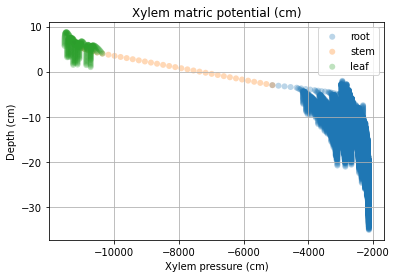

root -323.3826926709069
stem 0.0
leaves 323.38269267691766


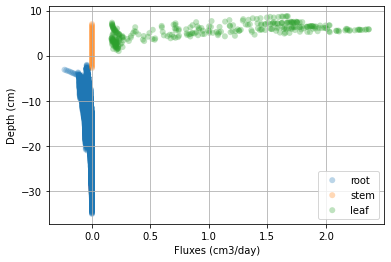

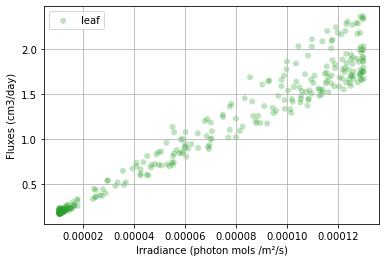

2 / 38
Incoming Light considered: 0.00015  photon mols /m²/s
0 [ 726.63826857  145.73276041  149.88220801 1222.93252329 1530.24978926
 1640.45450276 1755.76040896 1828.18292572 1909.87220591 1908.90403185
 1994.42584897 2005.73950201 1988.44357834 1936.16392968 1850.33427227
 1751.9976062  1585.26576046 1491.22726155 1316.46008505 1286.24347756
 1064.11187622  914.97074648  534.37147813  381.27375725  372.06559064
  303.22348929  134.41971992  133.15938397] 
 Mean 1797.6219599190222 stdv 222.59036601741536
1 [ 145.73276041  149.88220801 1222.93252329 1530.24978926 1640.45450276
 1755.76040896 1828.18292572 1909.87220591 1908.90403185 1994.42584897
 2005.73950201 1988.44357834 1936.16392968 1850.33427227 1751.9976062
 1585.26576046 1491.22726155 1316.46008505 1286.24347756 1064.11187622
  914.97074648  534.37147813  381.27375725  372.06559064  303.22348929
  134.41971992  133.15938397  644.31576118] 
 Mean 1841.7107168281148 stdv 142.31580603839618
2 [ 149.88220801 1222.93252329 1530.24

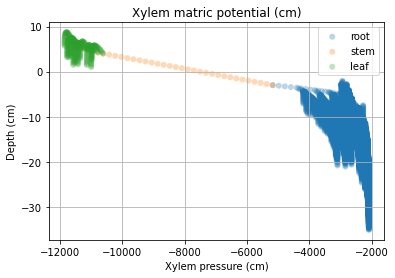

root -335.22374390314064
stem 0.0
leaves 335.22374390918765


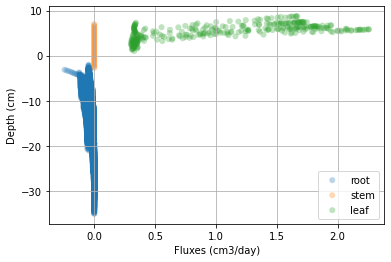

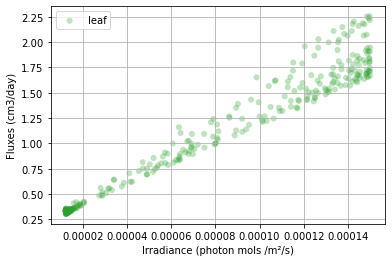

3 / 38
Incoming Light considered: 0.00015  photon mols /m²/s
0 [35.83398458  7.05156992  7.06249353 55.79073202 67.71156612 70.86331749
 74.58079472 76.93012967 80.21050994 80.60005688 85.26476632 87.43349039
 88.98729253 89.51228129 88.85679291 87.78988315 83.17179399 82.10758559
 76.17026209 78.25143686 68.06576259 61.46771758 37.59344694 27.94008702
 28.20691982 23.60925592 10.66298488 10.66403073] 
 Mean 78.89514418982996 stdv 9.907039893947646
1 [ 7.05156992  7.06249353 55.79073202 67.71156612 70.86331749 74.58079472
 76.93012967 80.21050994 80.60005688 85.26476632 87.43349039 88.98729253
 89.51228129 88.85679291 87.78988315 83.17179399 82.10758559 76.17026209
 78.25143686 68.06576259 61.46771758 37.59344694 27.94008702 28.20691982
 23.60925592 10.66298488 10.66403073 33.32698176] 
 Mean 81.56174011788612 stdv 7.29021597069698
2 [ 7.06249353 55.79073202 67.71156612 70.86331749 74.58079472 76.93012967
 80.21050994 80.60005688 85.26476632 87.43349039 88.98729253 89.51228129
 88.8567

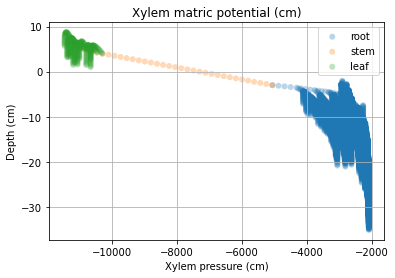

root -323.29919978900364
stem 0.0
leaves 323.2991997949552


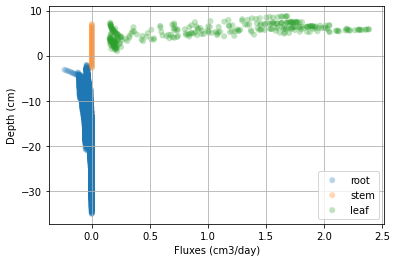

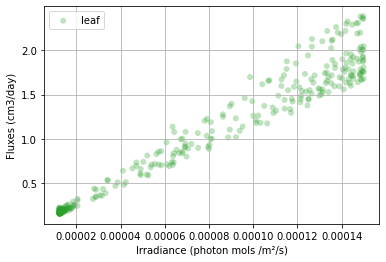

4 / 38
Incoming Light considered: 0.00015  photon mols /m²/s
0 [114.06550161  21.90820682  21.56261937 168.45264091 202.61841611
 209.92514268 218.25419498 221.77417467 227.02729819 223.16910594
 230.07122301 228.98866284 225.29578947 218.27330064 208.05508809
 196.93910425 178.53546396 168.61524814 149.74804988 147.47235959
 123.19928865 107.13396334  63.33300312  45.7266578   45.09962232
  37.08396328  16.5471934   16.4477672 ] 
 Mean 215.1587531266135 stdv 16.33262444491788
1 [ 21.90820682  21.56261937 168.45264091 202.61841611 209.92514268
 218.25419498 221.77417467 227.02729819 223.16910594 230.07122301
 228.98866284 225.29578947 218.27330064 208.05508809 196.93910425
 178.53546396 168.61524814 149.74804988 147.47235959 123.19928865
 107.13396334  63.33300312  45.7266578   45.09962232  37.08396328
  16.5471934   16.4477672  116.31024907] 
 Mean 217.53262507146155 stdv 10.343786080960191
2 [ 21.56261937 168.45264091 202.61841611 209.92514268 218.25419498
 221.77417467 227.02729819 

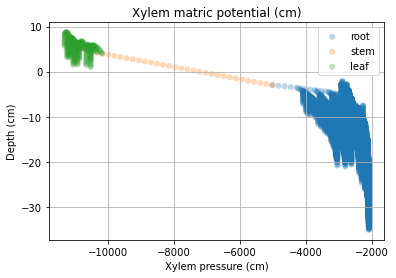

root -318.21679319127423
stem 0.0
leaves 318.2167931971439


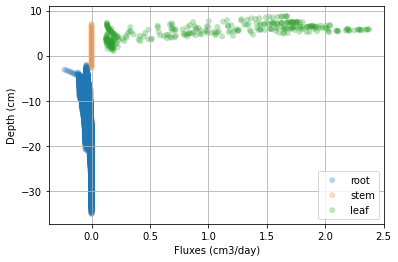

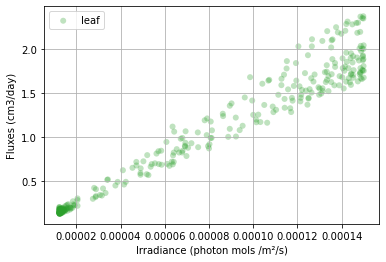

5 / 38
Incoming Light considered: 0.000175  photon mols /m²/s
0 [181.73059628  35.30430349  35.04342959 275.22295934 332.73847908
 346.68982786 362.76148956 371.37208713 383.48865357 380.82302855
 397.18459268 400.62565306 400.17101598 394.28576196 382.80795931
 369.55180498 341.9915329  329.83742197 299.17206388 300.7739886
 256.40324282 227.27863081 136.75666593 100.24230404 100.08052635
  83.07171733  37.31161246  37.20893145] 
 Mean 369.01429233913115 stdv 34.87745022608573
1 [ 35.30430349  35.04342959 275.22295934 332.73847908 346.68982786
 362.76148956 371.37208713 383.48865357 380.82302855 397.18459268
 400.62565306 400.17101598 394.28576196 382.80795931 369.55180498
 341.9915329  329.83742197 299.17206388 300.7739886  256.40324282
 227.27863081 136.75666593 100.24230404 100.08052635  83.07171733
  37.31161246  37.20893145 175.36152801] 
 Mean 376.87502947537916 stdv 20.53293883357349
2 [ 35.04342959 275.22295934 332.73847908 346.68982786 362.76148956
 371.37208713 383.48865357 

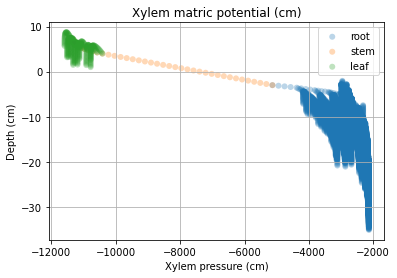

root -325.6231157709861
stem 0.0
leaves 325.6231157770257


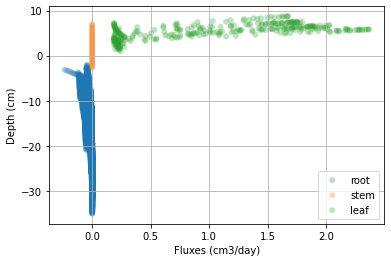

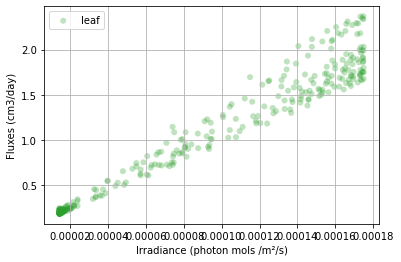

6 / 38
Incoming Light considered: 0.000175  photon mols /m²/s
0 [ 45.67279012   8.98257979   8.99188338  70.96692383  86.12399516
  90.13139208  94.83576226  97.77415187 101.85723154 102.23733587
 107.98556609 110.52780959 112.24978692 112.64114062 111.52883722
 109.89451485 103.83849339 102.23662872  94.60908432  96.95411706
  84.15669056  75.849363    46.32050163  34.37831263  34.66491579
  28.99020373  13.08737962  13.0846807 ] 
 Mean 99.90499441928941 stdv 12.2140517015839
1 [  8.98257979   8.99188338  70.96692383  86.12399516  90.13139208
  94.83576226  97.77415187 101.85723154 102.23733587 107.98556609
 110.52780959 112.24978692 112.64114062 111.52883722 109.89451485
 103.83849339 102.23662872  94.60908432  96.95411706  84.15669056
  75.849363    46.32050163  34.37831263  34.66491579  28.99020373
  13.08737962  13.0846807   42.68894771] 
 Mean 103.14896033722931 stdv 8.785857566477024
2 [  8.99188338  70.96692383  86.12399516  90.13139208  94.83576226
  97.77415187 101.85723154 1

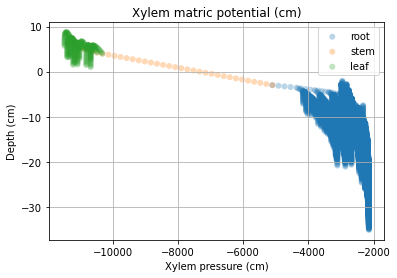

root -321.6811349553854
stem 0.0
leaves 321.68113496135726


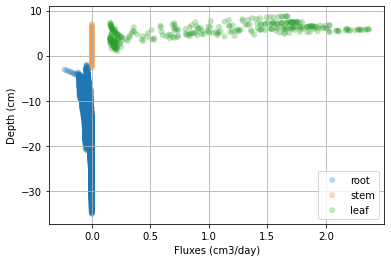

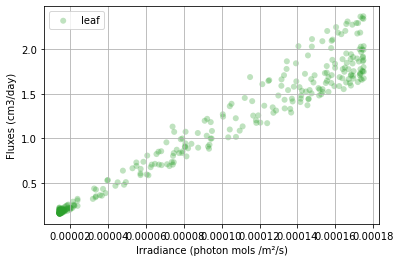

7 / 38
Incoming Light considered: 0.0002  photon mols /m²/s
0 [ 940.12885039  188.13123436  192.84188211 1565.36518241 1951.49206196
 2085.65203467 2226.06653328 2312.3006754  2410.42340852 2405.02924589
 2508.69699262 2519.85227259 2495.88851741 2428.90672669 2320.69146219
 2197.4528804  1989.14359876 1872.06901635 1654.05960455 1617.30993514
 1339.71318227 1153.40599534  674.80419836  482.09586772  470.88684871
  384.09624282  170.41609126  168.86858624] 
 Mean 2269.197092803592 stdv 269.5450029731169
1 [ 188.13123436  192.84188211 1565.36518241 1951.49206196 2085.65203467
 2226.06653328 2312.3006754  2410.42340852 2405.02924589 2508.69699262
 2519.85227259 2495.88851741 2428.90672669 2320.69146219 2197.4528804
 1989.14359876 1872.06901635 1654.05960455 1617.30993514 1339.71318227
 1153.40599534  674.80419836  482.09586772  470.88684871  384.09624282
  170.41609126  168.86858624  830.85955849] 
 Mean 2321.8710676360693 stdv 170.37395291029503
2 [ 192.84188211 1565.36518241 1951.49206

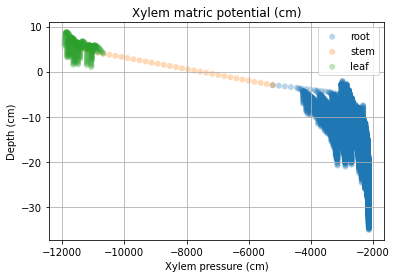

root -335.8466098714203
stem 0.0
leaves 335.84660987750175


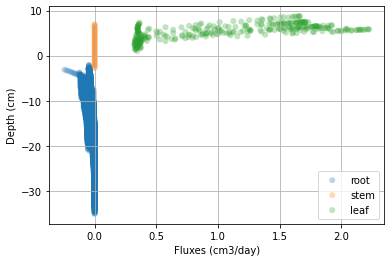

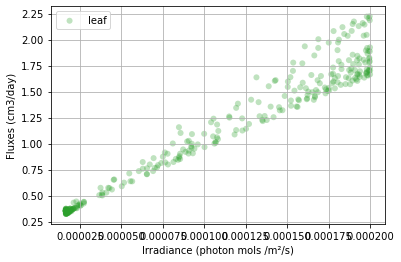

8 / 38
Incoming Light considered: 0.00025  photon mols /m²/s
0 [351.89633925  66.87943071  64.94648516 498.21038046 588.80589915
 598.89833669 610.69977624 608.51285341 610.94246184 589.56463869
 597.10350696 584.80269884 567.15926776 542.66505789 511.82936828
 480.25506511 432.38286315 406.01074997 359.03885101 352.23447152
 293.58843848 254.81053935 150.52620447 108.54219722 106.88992374
  87.8056827   39.17211926  38.92786645] 
 Mean 575.7661871845909 stdv 36.78215297935443
1 [ 66.87943071  64.94648516 498.21038046 588.80589915 598.89833669
 610.69977624 608.51285341 610.94246184 589.56463869 597.10350696
 584.80269884 567.15926776 542.66505789 511.82936828 480.25506511
 432.38286315 406.01074997 359.03885101 352.23447152 293.58843848
 254.81053935 150.52620447 108.54219722 106.88992374  87.8056827
  39.17211926  38.92786645 267.08134963] 
 Mean 574.2699109051706 stdv 40.12036733892587
2 [ 64.94648516 498.21038046 588.80589915 598.89833669 610.69977624
 608.51285341 610.94246184 589

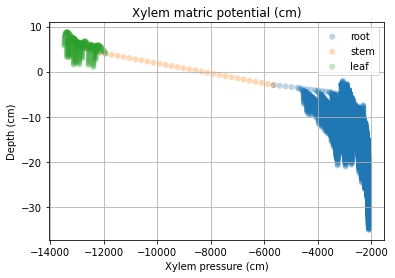

root -387.0406274052939
stem 0.0
leaves 387.0406274118734


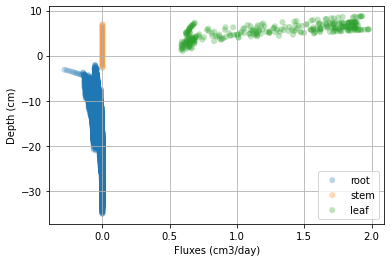

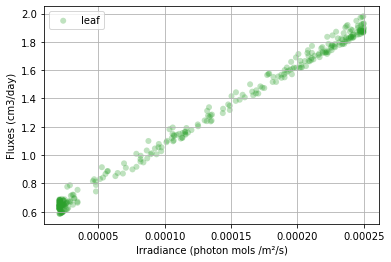

9 / 38
Incoming Light considered: 0.00025  photon mols /m²/s
0 [181.87655083  34.08269941  32.63927588 247.0068444  288.25397072
 289.87114469 292.60303908 288.96765721 287.88014978 275.95815169
 277.90811416 270.90013558 261.71861049 249.65679695 234.93207381
 220.08555503 197.95169299 185.79944996 164.31689545 161.29109279
 134.56563969 116.94526192  69.18894663  49.96868448  49.27846254
  40.52953225  18.09752167  17.99350074] 
 Mean 272.13805737914856 stdv 18.7156431396426
1 [ 34.08269941  32.63927588 247.0068444  288.25397072 289.87114469
 292.60303908 288.96765721 287.88014978 275.95815169 277.90811416
 270.90013558 261.71861049 249.65679695 234.93207381 220.08555503
 197.95169299 185.79944996 164.31689545 161.29109279 134.56563969
 116.94526192  69.18894663  49.96868448  49.27846254  40.52953225
  18.09752167  17.99350074 131.89462797] 
 Mean 269.894616598479 stdv 22.768385234365482
2 [ 32.63927588 247.0068444  288.25397072 289.87114469 292.60303908
 288.96765721 287.88014978 27

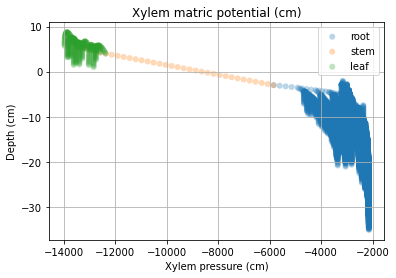

root -402.2362753032846
stem 0.0
leaves 402.236275310035


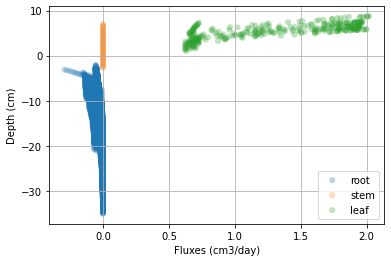

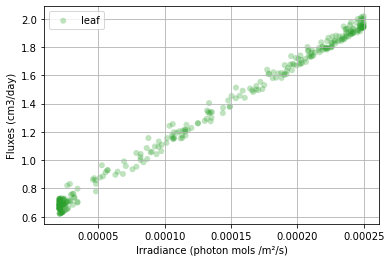

10 / 38
Incoming Light considered: 0.00025  photon mols /m²/s
0 [393.35576565  74.96160377  72.99032669 561.35933256 665.10622724
 678.08992775 692.92953141 691.78666025 695.75605922 672.45353827
 681.9775581  668.71920541 649.19966628 621.6875245  586.76500231
 550.86367888 496.15222245 466.01296427 412.16092108 404.35877914
 337.01277936 292.4526032  172.72857939 124.52238388 122.59780525
 100.68863502  44.91291764  44.62882693] 
 Mean 655.4858527757689 stdv 41.70731119698789
1 [ 74.96160377  72.99032669 561.35933256 665.10622724 678.08992775
 692.92953141 691.78666025 695.75605922 672.45353827 681.9775581
 668.71920541 649.19966628 621.6875245  586.76500231 550.86367888
 496.15222245 466.01296427 412.16092108 404.35877914 337.01277936
 292.4526032  172.72857939 124.52238388 122.59780525 100.68863502
  44.91291764  44.62882693 301.37546236] 
 Mean 654.6112149692634 stdv 43.7329159542023
2 [ 72.99032669 561.35933256 665.10622724 678.08992775 692.92953141
 691.78666025 695.75605922 672

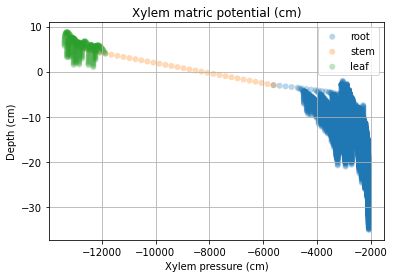

root -384.4910214584992
stem 0.0
leaves 384.49102146499996


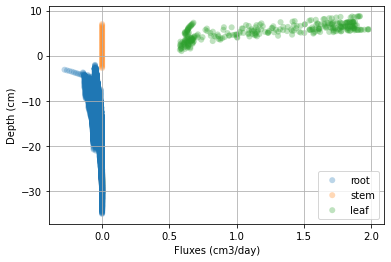

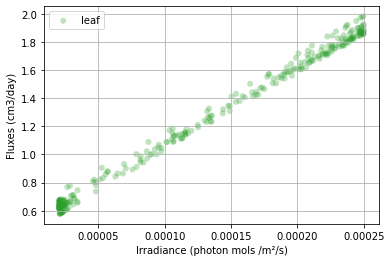

11 / 38
Incoming Light considered: 0.000275  photon mols /m²/s
0 [164.64863836  30.76097461  29.35504768 221.17590398 257.27077216
 258.04729367 259.91438186 256.24011541 254.91826035 244.11917319
 245.6396582  239.3246284  231.15187963 220.48807411 207.51264387
 194.45268627 174.97779029 164.31055494 145.4032253  142.79726542
 119.22987491 103.69311893  61.40990378  44.38179685  43.78976219
  36.03183456  16.09650638  16.00619541] 
 Mean 241.31689873581905 stdv 16.84255770751398
1 [ 30.76097461  29.35504768 221.17590398 257.27077216 258.04729367
 259.91438186 256.24011541 254.91826035 244.11917319 245.6396582
 239.3246284  231.15187963 220.48807411 207.51264387 194.45268627
 174.97779029 164.31055494 145.4032253  142.79726542 119.22987491
 103.69311893  61.40990378  44.38179685  43.78976219  36.03183456
  16.09650638  16.00619541 118.27651171] 
 Mean 239.08996392630786 stdv 20.686438549807242
2 [ 29.35504768 221.17590398 257.27077216 258.04729367 259.91438186
 256.24011541 254.9182603

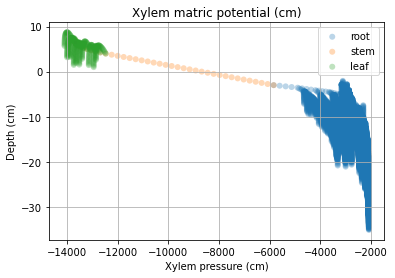

root -408.9881669459464
stem 0.0
leaves 408.9881669527461


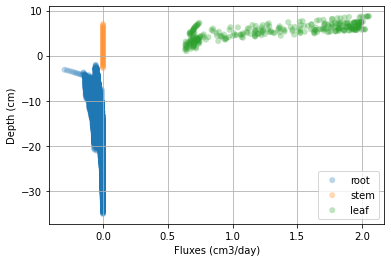

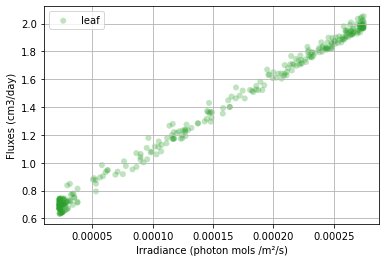

12 / 38
Incoming Light considered: 0.0003  photon mols /m²/s
0 [47.94745863  9.03081711  8.70371237 66.32829006 78.28203563 79.85916799
 81.94537649 82.39643919 83.65401631 81.7754123  83.96878523 83.4446276
 82.14109807 79.77579871 76.35871604 72.67896466 66.34527498 63.11149289
 56.5058814  56.06347044 47.2399723  41.40658077 24.69085443 17.94318981
 17.7799759  14.67724376  6.5709678   6.53967852] 
 Mean 79.99414696893557 stdv 4.667512209659595
1 [ 9.03081711  8.70371237 66.32829006 78.28203563 79.85916799 81.94537649
 82.39643919 83.65401631 81.7754123  83.96878523 83.4446276  82.14109807
 79.77579871 76.35871604 72.67896466 66.34527498 63.11149289 56.5058814
 56.06347044 47.2399723  41.40658077 24.69085443 17.94318981 17.7799759
 14.67724376  6.5709678   6.53967852 39.16120407] 
 Mean 80.52336985238325 stdv 3.225205000851485
2 [ 8.70371237 66.32829006 78.28203563 79.85916799 81.94537649 82.39643919
 83.65401631 81.7754123  83.96878523 83.4446276  82.14109807 79.77579871
 76.358716

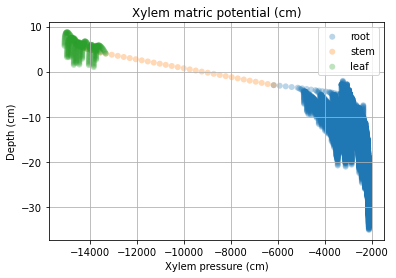

root -440.3716061283392
stem 0.0
leaves 440.3716061355142


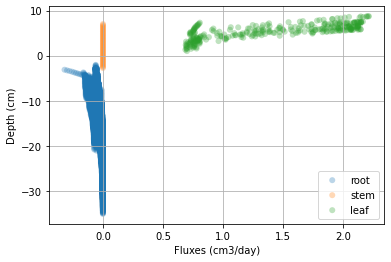

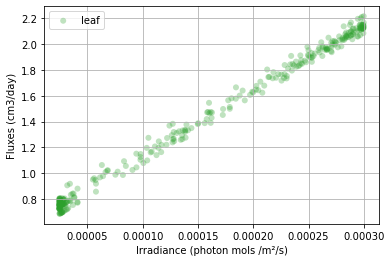

13 / 38
Incoming Light considered: 0.0003  photon mols /m²/s
0 [ 62.23680394  11.62996508  11.11444696  83.94373978  98.16985798
  99.23129775 100.9023103  100.56520209 101.23837766  98.17432267
 100.05198406  98.73788302  96.57736661  93.25494996  88.79716029
  84.12680404  76.4821372   72.49365571  64.70507656  64.02739659
  53.83101512  47.09725219  28.04335005  20.3555309   20.15189912
  16.6245432    7.43995504   7.40338785] 
 Mean 96.63703768108032 stdv 5.134355698101852
1 [ 11.62996508  11.11444696  83.94373978  98.16985798  99.23129775
 100.9023103  100.56520209 101.23837766  98.17432267 100.05198406
  98.73788302  96.57736661  93.25494996  88.79716029  84.12680404
  76.4821372   72.49365571  64.70507656  64.02739659  53.83101512
  47.09725219  28.04335005  20.3555309   20.15189912  16.6245432
   7.43995504   7.40338785  47.78293197] 
 Mean 96.65229303619648 stdv 5.0967525822698185
2 [ 11.11444696  83.94373978  98.16985798  99.23129775 100.9023103
 100.56520209 101.23837766  98

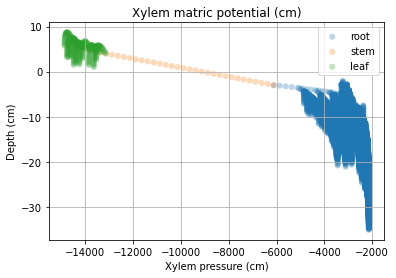

root -432.6244500005008
stem 0.0
leaves 432.6244500076641


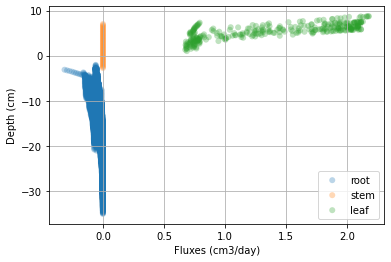

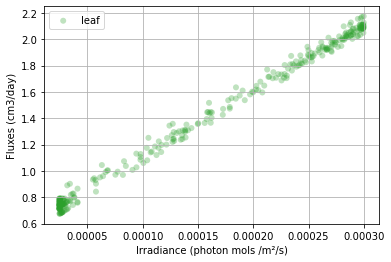

14 / 38
Incoming Light considered: 0.0003  photon mols /m²/s
0 [ 66.10111102  12.33478035  11.76983574  88.74247743 103.60121799
 104.53578211 106.10660231 105.56599567 106.09045134 102.71058867
 104.5112524  102.98776747 100.59780706  97.01657151  92.27508243
  87.333466    79.32636915  75.12992309  67.01205277  66.27047032
  55.68934276  48.70299547  28.99013969  21.03715629  20.82228843
  17.17504561   7.68567471   7.64761701] 
 Mean 101.2284663672259 stdv 5.424380613024115
1 [ 12.33478035  11.76983574  88.74247743 103.60121799 104.53578211
 106.10660231 105.56599567 106.09045134 102.71058867 104.5112524
 102.98776747 100.59780706  97.01657151  92.27508243  87.333466
  79.32636915  75.12992309  67.01205277  66.27047032  55.68934276
  48.70299547  28.99013969  21.03715629  20.82228843  17.17504561
   7.68567471   7.64761701  50.14909459] 
 Mean 101.11104874788263 stdv 5.701553393361002
2 [ 11.76983574  88.74247743 103.60121799 104.53578211 106.10660231
 105.56599567 106.09045134 102.

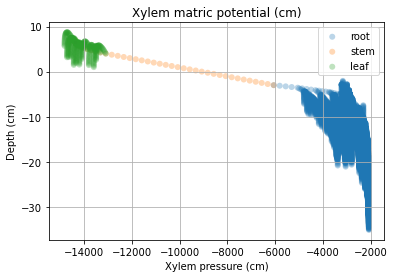

root -432.8607546521951
stem 0.0
leaves 432.8607546592144


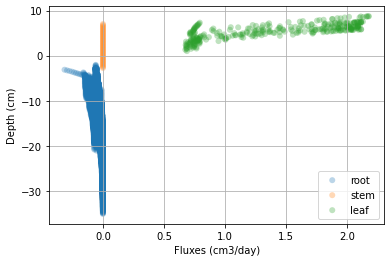

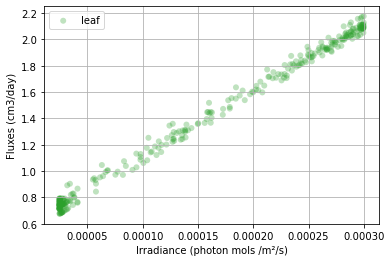

15 / 38
Incoming Light considered: 0.0003  photon mols /m²/s
0 [ 93.21083802  17.34137179  16.48329607 123.68388563 143.6050006
 144.02157534 145.23061313 143.50552826 143.2156139  137.69173718
 139.14966542 136.21956698 132.22591318 126.77012549 119.9185917
 112.93072852 102.11475474  96.32082029  85.60572622  84.39111913
  70.7268316   61.71329538  36.66664254  26.56697209  26.26353028
  21.64422472   9.68048991   9.63038407] 
 Mean 136.26981806833473 stdv 8.354009009583656
1 [ 17.34137179  16.48329607 123.68388563 143.6050006  144.02157534
 145.23061313 143.50552826 143.2156139  137.69173718 139.14966542
 136.21956698 132.22591318 126.77012549 119.9185917  112.93072852
 102.11475474  96.32082029  85.60572622  84.39111913  70.7268316
  61.71329538  36.66664254  26.56697209  26.26353028  21.64422472
   9.68048991   9.63038407  67.80133265] 
 Mean 135.373721642358 stdv 10.058765407708048
2 [ 16.48329607 123.68388563 143.6050006  144.02157534 145.23061313
 143.50552826 143.2156139  137.

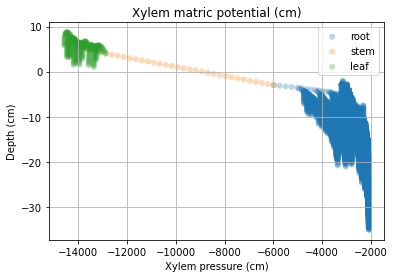

root -424.1937550280297
stem 0.0
leaves 424.19375503493677


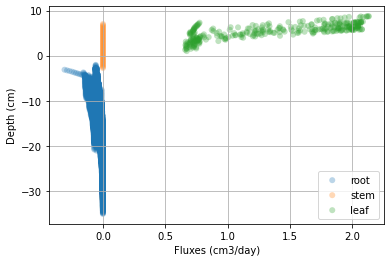

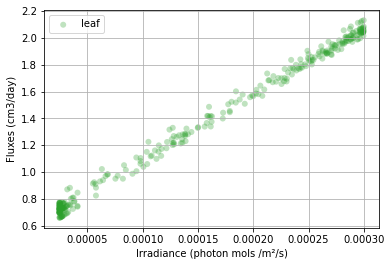

16 / 38
Incoming Light considered: 0.0003  photon mols /m²/s
0 [163.80571095  30.59267781  29.16421716 219.23371649 254.70776914
 255.29165368 256.99042401 253.26324761 251.88938145 241.21039865
 242.69111621 236.47499161 228.44465298 217.9699533  205.22026738
 192.38480923 173.2101044  162.71996326 144.07537468 141.53922551
 118.2523908  102.89375207  60.98541337  44.09472827  43.5160605
  35.81578371  16.00533404  15.91643366] 
 Mean 238.61563104433154 stdv 16.61814079620441
1 [ 30.59267781  29.16421716 219.23371649 254.70776914 255.29165368
 256.99042401 253.26324761 251.88938145 241.21039865 242.69111621
 236.47499161 228.44465298 217.9699533  205.22026738 192.38480923
 173.2101044  162.71996326 144.07537468 141.53922551 118.2523908
 102.89375207  60.98541337  44.09472827  43.5160605   35.81578371
  16.00533404  15.91643366 117.45863254] 
 Mean 236.37822210564443 stdv 20.4440487085103
2 [ 29.16421716 219.23371649 254.70776914 255.29165368 256.99042401
 253.26324761 251.88938145 241

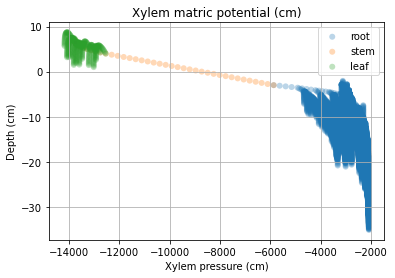

root -410.72099234658447
stem 0.0
leaves 410.7209923533828


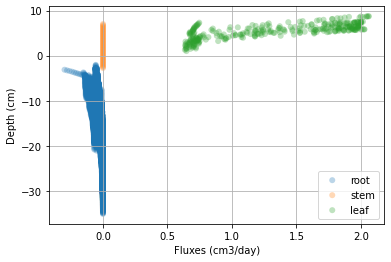

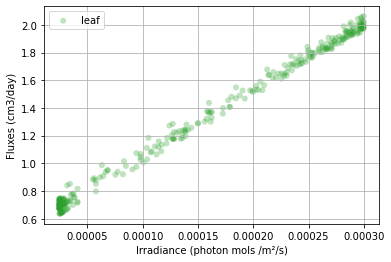

17 / 38
Incoming Light considered: 0.000325  photon mols /m²/s
0 [150.05364509  27.99839421  26.6552054  199.93069596 232.01808178
 232.42131303 233.90747042 230.52851987 229.33871402 219.73707369
 221.21307931 215.71432717 208.57327335 199.20320811 187.74502696
 176.18647515 158.80292602 149.33217264 132.36000336 130.13591619
 108.83442594  94.77981718  56.23522373  40.68884171  40.17337228
  33.07855079  14.78818316  14.7076708 ] 
 Mean 217.52756530575385 stdv 14.840798830652457
1 [ 27.99839421  26.6552054  199.93069596 232.01808178 232.42131303
 233.90747042 230.52851987 229.33871402 219.73707369 221.21307931
 215.71432717 208.57327335 199.20320811 187.74502696 176.18647515
 158.80292602 149.33217264 132.36000336 130.13591619 108.83442594
  94.77981718  56.23522373  40.68884171  40.17337228  33.07855079
  14.78818316  14.7076708  107.66776238] 
 Mean 215.54888023771917 stdv 18.247021010055594
2 [ 26.6552054  199.93069596 232.01808178 232.42131303 233.90747042
 230.52851987 229.33871

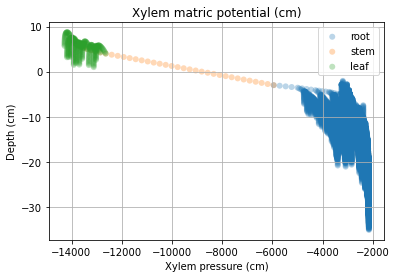

root -412.56110588625097
stem 0.0
leaves 412.5611058931037


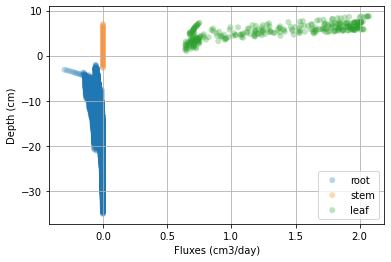

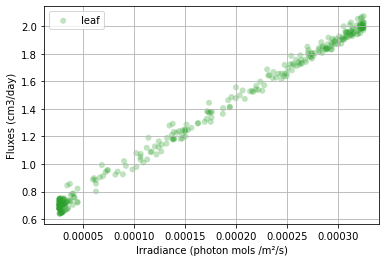

18 / 38
Incoming Light considered: 0.0004  photon mols /m²/s
0 [44.67390349  8.61854971  8.48153052 65.6366272  78.85421991 81.87754768
 85.39870813 87.18276281 89.73708282 88.85767046 92.25098357 92.61475822
 92.00932901 90.10438462 86.89290791 83.25557083 76.47227332 73.10876066
 65.77022944 65.47207174 55.38036878 48.68322528 29.1352179  21.21663238
 21.04599759 17.39129972  7.79531197  7.75951246] 
 Mean 85.95141519441825 stdv 7.321048850475495
1 [ 8.61854971  8.48153052 65.6366272  78.85421991 81.87754768 85.39870813
 87.18276281 89.73708282 88.85767046 92.25098357 92.61475822 92.00932901
 90.10438462 86.89290791 83.25557083 76.47227332 73.10876066 65.77022944
 65.47207174 55.38036878 48.68322528 29.1352179  21.21663238 21.04599759
 17.39129972  7.79531197  7.75951246 41.47631354] 
 Mean 87.41966049736025 stdv 4.201994660151309
2 [ 8.48153052 65.6366272  78.85421991 81.87754768 85.39870813 87.18276281
 89.73708282 88.85767046 92.25098357 92.61475822 92.00932901 90.10438462
 86.892

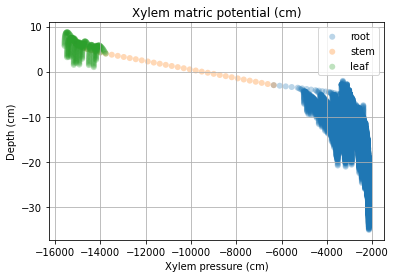

root -457.3118927461876
stem 0.0
leaves 457.3118927535354


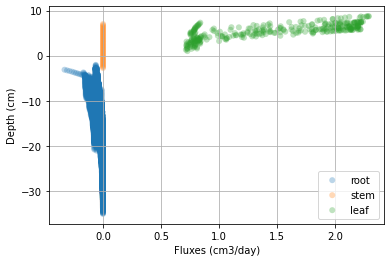

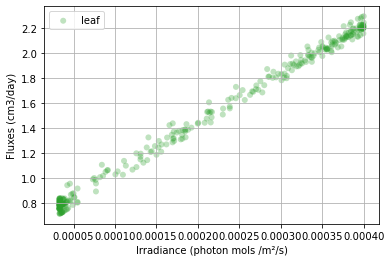

19 / 38
Incoming Light considered: 0.0004  photon mols /m²/s
0 [100.14722365  18.70184154  17.80671831 133.29308319 154.95421459
 155.82633782 157.60453602 156.26619867 156.4908164  151.04949584
 153.16369196 150.48890406 146.61055613 141.07214702 133.92527375
 126.54744402 114.82697224 108.61435252  96.81867113  95.6273361
  80.36009315  70.26273981  41.86828786  30.384129    30.05996335
  24.79348813  11.10068082  11.04481094] 
 Mean 149.2287712877592 stdv 8.31985596316207
1 [ 18.70184154  17.80671831 133.29308319 154.95421459 155.82633782
 157.60453602 156.26619867 156.4908164  151.04949584 153.16369196
 150.48890406 146.61055613 141.07214702 133.92527375 126.54744402
 114.82697224 108.61435252  96.81867113  95.6273361   80.36009315
  70.26273981  41.86828786  30.384129    30.05996335  24.79348813
  11.10068082  11.04481094  74.47580197] 
 Mean 148.6666346906245 stdv 9.519035839055256
2 [ 17.80671831 133.29308319 154.95421459 155.82633782 157.60453602
 156.26619867 156.4908164  151.

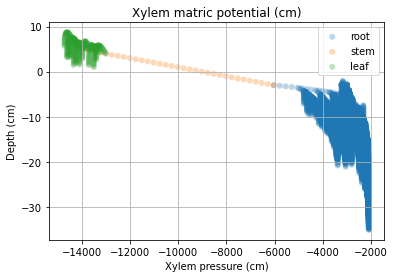

root -429.3452260836388
stem 0.0
leaves 429.3452260906238


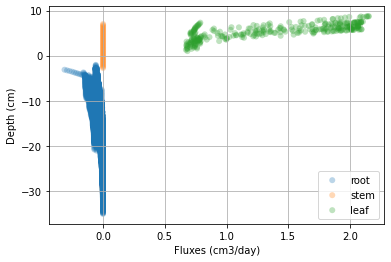

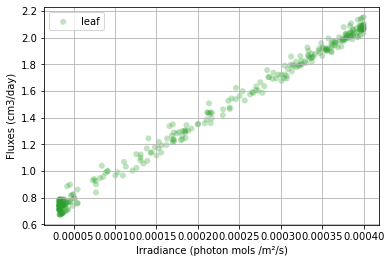

20 / 38
Incoming Light considered: 0.00045  photon mols /m²/s
0 [ 44.76968409   8.75139129   8.70631974  67.88717213  82.21285176
  86.00719712  90.29199267  92.71096611  95.90030169  95.3888033
  99.38943671 100.11001554  99.74390729  97.93129349  94.65981356
  90.88160238  83.64013044  80.08025727  72.15051762  71.88859953
  60.88551624  53.57192155  32.10365306  23.39390247  23.21214606
  19.18747397   8.60425114   8.5651058 ] 
 Mean 91.8528126152312 stdv 8.97026865112571
1 [  8.75139129   8.70631974  67.88717213  82.21285176  86.00719712
  90.29199267  92.71096611  95.90030169  95.3888033   99.38943671
 100.11001554  99.74390729  97.93129349  94.65981356  90.88160238
  83.64013044  80.08025727  72.15051762  71.88859953  60.88551624
  53.57192155  32.10365306  23.39390247  23.21214606  19.18747397
   8.60425114   8.5651058   44.10870957] 
 Mean 93.76901513594571 stdv 5.386077548207674
2 [  8.70631974  67.88717213  82.21285176  86.00719712  90.29199267
  92.71096611  95.90030169  95.

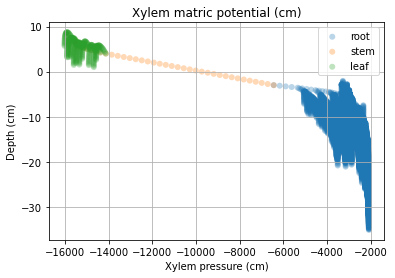

root -473.6419763616818
stem 0.0
leaves 473.64197636909057


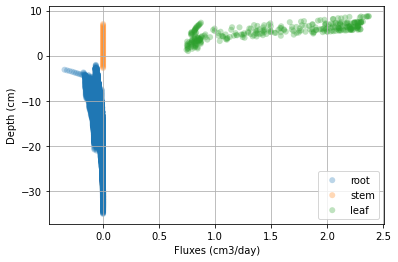

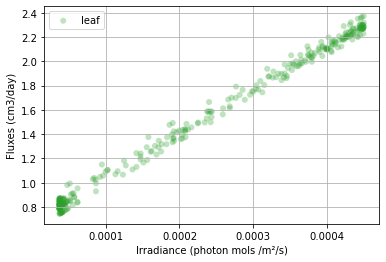

21 / 38
Incoming Light considered: 0.0005  photon mols /m²/s
0 [ 47.64275863   9.38082471   9.38057016  73.29162554  89.01404557
  93.38902055  98.26885233 101.10440308 104.74955632 104.35336978
 108.83731525 109.73753799 109.43682487 107.54262419 104.03935867
  99.96500172  92.08348596  88.21561549  79.54115789  79.27298856
  67.19254247  59.15184108  35.48438551  25.86822233  25.66923594
  21.22255009   9.52038857   9.47719269] 
 Mean 100.31371117749379 stdv 10.236610255377363
1 [  9.38082471   9.38057016  73.29162554  89.01404557  93.38902055
  98.26885233 101.10440308 104.74955632 104.35336978 108.83731525
 109.73753799 109.43682487 107.54262419 104.03935867  99.96500172
  92.08348596  88.21561549  79.54115789  79.27298856  67.19254247
  59.15184108  35.48438551  25.86822233  25.66923594  21.22255009
   9.52038857   9.47719269  48.18301398] 
 Mean 102.53649252536276 stdv 6.245649669549627
2 [  9.38057016  73.29162554  89.01404557  93.38902055  98.26885233
 101.10440308 104.74955632

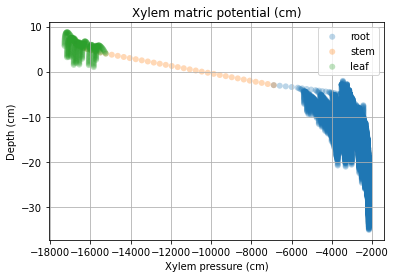

root -515.0851900961651
stem 0.0
leaves 515.0851901040974


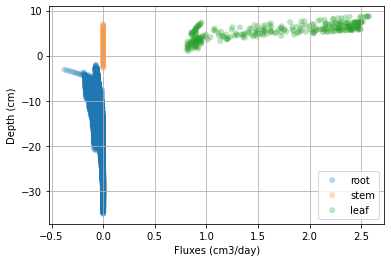

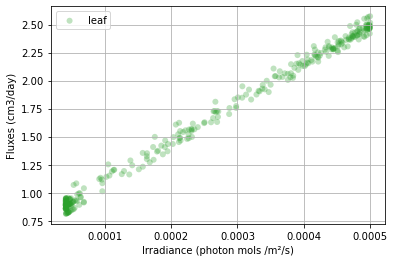

22 / 38
Incoming Light considered: 0.00055  photon mols /m²/s
0 [ 52.3907177   10.32882379  10.32882378  80.51186786  97.70224137
 102.47885185 107.801922   110.89297701 114.86367047 114.43274589
 119.31306461 120.29249494 119.96564639 117.90514447 114.09190167
 109.65349963 101.05774623  96.8349357   87.35468774  87.06143384
  73.838323    65.02581665  39.04371441  28.47196727  28.25313049
  23.36201869  10.48363289  10.43607884] 
 Mean 110.02104404373891 stdv 11.171012866519042
1 [ 10.32882379  10.32882378  80.51186786  97.70224137 102.47885185
 107.801922   110.89297701 114.86367047 114.43274589 119.31306461
 120.29249494 119.96564639 117.90514447 114.09190167 109.65349963
 101.05774623  96.8349357   87.35468774  87.06143384  73.838323
  65.02581665  39.04371441  28.47196727  28.25313049  23.36201869
  10.48363289  10.43607884  52.99022511] 
 Mean 112.44951335753608 stdv 6.80730240896338
2 [ 10.32882378  80.51186786  97.70224137 102.47885185 107.801922
 110.89297701 114.86367047 114

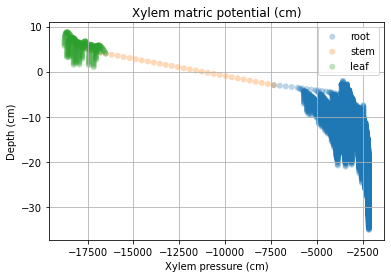

root -565.1326158107081
stem 0.0
leaves 565.1326158191689


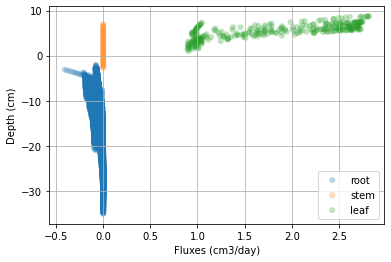

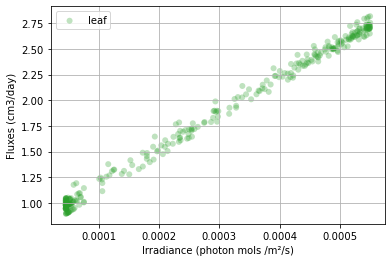

23 / 38
Incoming Light considered: 0.00055  photon mols /m²/s
0 [ 52.1394695   10.28153774  10.28153712  80.10956915  97.19916985
 101.94636476 107.23583788 110.30696399 114.25157989 113.82351171
 118.67107998 119.64383021 119.31921476 117.27269786 113.48492164
 109.07551394 100.5340768   96.33712898  86.91315981  86.62160983
  73.47325087  64.70851432  38.85952248  28.33923068  28.12144505
  23.25368876  10.43562933  10.38829513] 
 Mean 109.43872847315212 stdv 11.101371909475636
1 [ 10.28153774  10.28153712  80.10956915  97.19916985 101.94636476
 107.23583788 110.30696399 114.25157989 113.82351171 118.67107998
 119.64383021 119.31921476 117.27269786 113.48492164 109.07551394
 100.5340768   96.33712898  86.91315981  86.62160983  73.47325087
  64.70851432  38.85952248  28.33923068  28.12144505  23.25368876
  10.43562933  10.38829513  52.73589001] 
 Mean 111.85255720637625 stdv 6.763252468177966
2 [ 10.28153712  80.10956915  97.19916985 101.94636476 107.23583788
 110.30696399 114.2515798

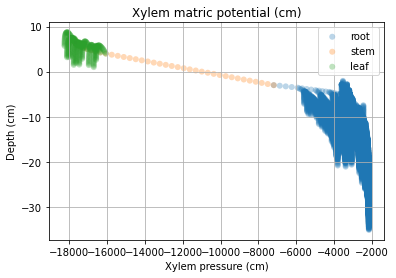

root -547.9533623884099
stem 0.0
leaves 547.9533623966989


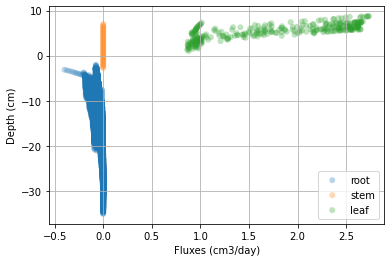

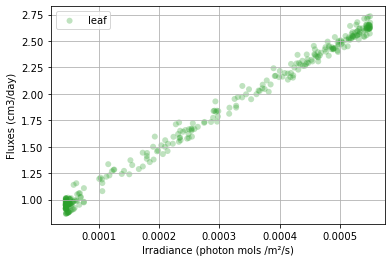

24 / 38
Incoming Light considered: 0.0006  photon mols /m²/s
0 [ 56.60878466  11.17823056  11.17823056  86.86417919 105.29051415
 110.39898035 116.08515982 119.38361931 123.616803   123.15761208
 128.35478704 129.39692201 129.04918185 126.85620302 122.79437169
 118.06128966 108.87972022 104.36237143  94.20626769  93.89180517
  79.69540826  70.21760022  42.21155098  30.79460099  30.55815698
  25.27241804  11.34571644  11.29426853] 
 Mean 118.43736112642667 stdv 11.94011132529034
1 [ 11.17823056  11.17823056  86.86417919 105.29051415 110.39898035
 116.08515982 119.38361931 123.616803   123.15761208 128.35478704
 129.39692201 129.04918185 126.85620302 122.79437169 118.06128966
 108.87972022 104.36237143  94.20626769  93.89180517  79.69540826
  70.21760022  42.21155098  30.79460099  30.55815698  25.27241804
  11.34571644  11.29426853  57.2549723 ] 
 Mean 121.0371203320591 stdv 7.262722967048031
2 [ 11.17823056  86.86417919 105.29051415 110.39898035 116.08515982
 119.38361931 123.616803   1

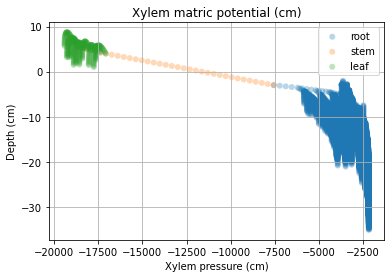

root -587.7491813221665
stem 0.0
leaves 587.7491813308252


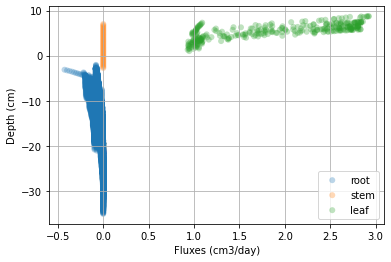

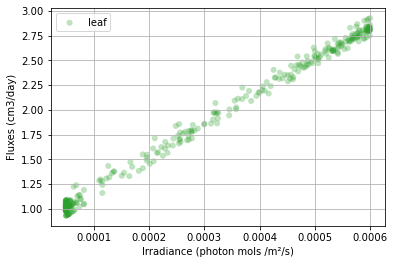

25 / 38
Incoming Light considered: 0.0006  photon mols /m²/s
0 [ 56.40190808  11.13924617  11.13924607  86.53290599 104.87600732
 109.96012437 115.61845838 118.90038238 123.11190688 122.65508995
 127.82503076 128.86160588 128.51572468 126.3343828  122.29372314
 117.5847164  108.44816895 103.95222361  93.8426279   93.52957218
  79.39482819  69.9563669   42.05985577  30.68524881  30.44966997
  25.18315675  11.30614204  11.2548753 ] 
 Mean 117.95711187790516 stdv 11.882419690872942
1 [ 11.13924617  11.13924607  86.53290599 104.87600732 109.96012437
 115.61845838 118.90038238 123.11190688 122.65508995 127.82503076
 128.86160588 128.51572468 126.3343828  122.29372314 117.5847164
 108.44816895 103.95222361  93.8426279   93.52957218  79.39482819
  69.9563669   42.05985577  30.68524881  30.44966997  25.18315675
  11.30614204  11.2548753   57.04556424] 
 Mean 120.5447627459345 stdv 7.226164790194042
2 [ 11.13924607  86.53290599 104.87600732 109.96012437 115.61845838
 118.90038238 123.11190688 1

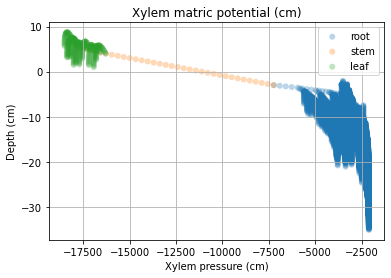

root -558.2883705063374
stem 0.0
leaves 558.2883705146273


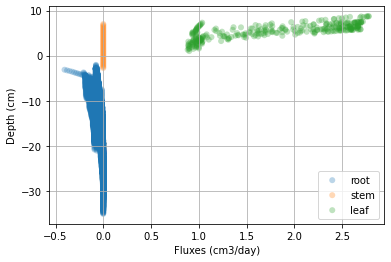

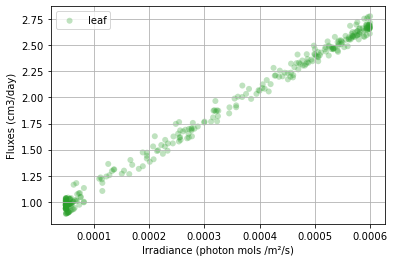

26 / 38
Incoming Light considered: 0.0006  photon mols /m²/s
0 [ 56.33324921  11.12661755  11.12660912  86.42036433 104.73299663
 109.80800147 115.45582521 118.73145455 122.93468617 122.4787722
 127.63821236 128.67262851 128.32746498 126.15062306 122.11810692
 117.41828827 108.29871332 103.81073918  93.7182484   93.40570513
  79.2931702   69.86861764  42.00980332  30.64939642  30.41410571
  25.15397609  11.29329265  11.24208504] 
 Mean 117.78909469904401 stdv 11.860748796973663
1 [ 11.12661755  11.12660912  86.42036433 104.73299663 109.80800147
 115.45582521 118.73145455 122.93468617 122.4787722  127.63821236
 128.67262851 128.32746498 126.15062306 122.11810692 117.41828827
 108.29871332 103.81073918  93.7182484   93.40570513  79.2931702
  69.86861764  42.00980332  30.64939642  30.41410571  25.15397609
  11.29329265  11.24208504  56.97585363] 
 Mean 120.37225502716697 stdv 7.2122349152389384
2 [ 11.12660912  86.42036433 104.73299663 109.80800147 115.45582521
 118.73145455 122.93468617 

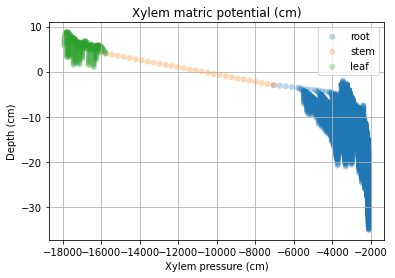

root -537.7051496158127
stem 0.0
leaves 537.7051496238889


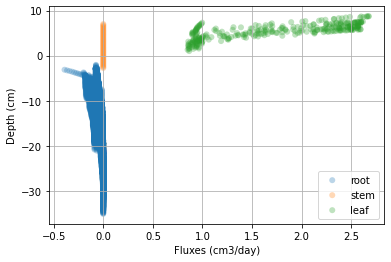

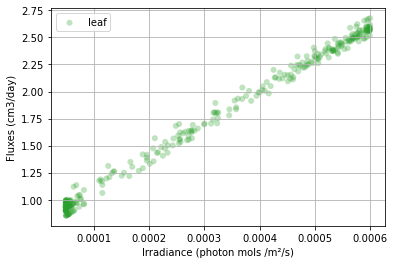

27 / 38
Incoming Light considered: 0.0006  photon mols /m²/s
0 [ 56.2871329   11.11726173  11.11631943  86.32036048 104.59988147
 109.66200134 115.29617359 118.56284775 122.75558392 122.29887934
 127.44625359 128.47736581 128.13207624 125.95919632 121.93457344
 117.24387394 108.1416352  103.66173977  93.58694999  93.27481514
  79.18549083  69.77551665  41.95652272  30.6111773   30.37618183
  25.12283873  11.27956424  11.2284191 ] 
 Mean 117.62043277431586 stdv 11.832776033382723
1 [ 11.11726173  11.11631943  86.32036048 104.59988147 109.66200134
 115.29617359 118.56284775 122.75558392 122.29887934 127.44625359
 128.47736581 128.13207624 125.95919632 121.93457344 117.24387394
 108.1416352  103.66173977  93.58694999  93.27481514  79.18549083
  69.77551665  41.95652272  30.6111773   30.37618183  25.12283873
  11.27956424  11.2284191   56.90694208] 
 Mean 120.19739222914853 stdv 7.193363229322327
2 [ 11.11631943  86.32036048 104.59988147 109.66200134 115.29617359
 118.56284775 122.75558392

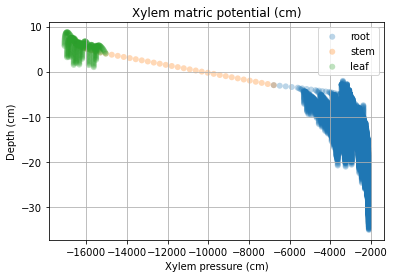

root -509.4156382883719
stem 0.0
leaves 509.4156382961909


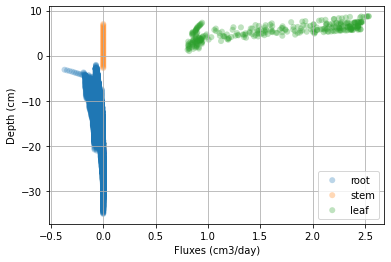

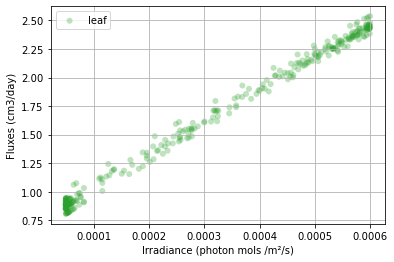

28 / 38
Incoming Light considered: 0.0006  photon mols /m²/s
0 [ 56.65094684  11.17581634  11.16387258  86.61920332 104.89229721
 109.90917535 115.50529542 118.73543842 122.89847625 122.41213688
 127.539501   128.55094294 128.18877485 126.00149357 121.96484609
 117.26455906 108.15434182 103.66891307  93.58973061  93.27459902
  79.18327583  69.77215157  41.95383815  30.60884836  30.37359669
  25.12054409  11.27849222  11.22733592] 
 Mean 117.76813177398148 stdv 11.752618561619053
1 [ 11.17581634  11.16387258  86.61920332 104.89229721 109.90917535
 115.50529542 118.73543842 122.89847625 122.41213688 127.539501
 128.55094294 128.18877485 126.00149357 121.96484609 117.26455906
 108.15434182 103.66891307  93.58973061  93.27459902  79.18327583
  69.77215157  41.95383815  30.60884836  30.37359669  25.12054409
  11.27849222  11.22733592  56.99855405] 
 Mean 120.32191141896351 stdv 7.1252185500505965
2 [ 11.16387258  86.61920332 104.89229721 109.90917535 115.50529542
 118.73543842 122.89847625 

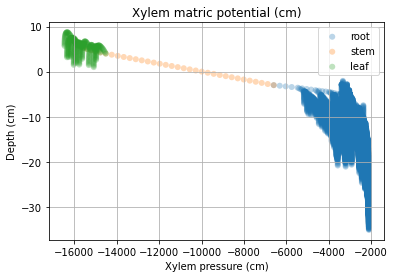

root -488.8546182033265
stem 0.0
leaves 488.8546182109569


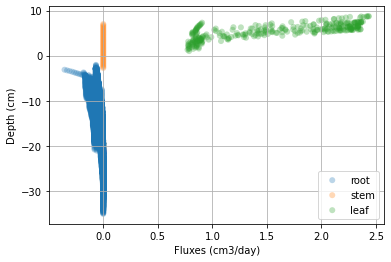

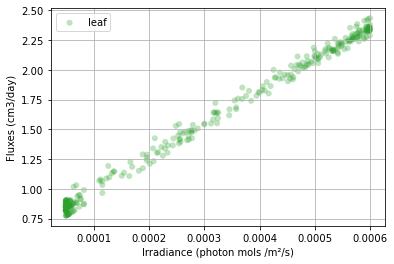

29 / 38
Incoming Light considered: 0.0006  photon mols /m²/s
0 [ 61.83438689  12.07010127  11.94424063  91.89494061 110.47717797
 115.0447752  120.25905079 123.05919992 126.8768743  125.95587131
 130.85718073 131.57663558 130.93761181 128.48135936 124.18488583
 119.25343006 109.87807708 105.23082231  94.93390119  94.55735081
  80.23653726  70.67444463  42.48610329  30.99048916  30.74682967
  25.42632012  11.41519686  11.36310436] 
 Mean 121.63379694976312 stdv 10.902086204892713
1 [ 12.07010127  11.94424063  91.89494061 110.47717797 115.0447752
 120.25905079 123.05919992 126.8768743  125.95587131 130.85718073
 131.57663558 130.93761181 128.48135936 124.18488583 119.25343006
 109.87807708 105.23082231  94.93390119  94.55735081  80.23653726
  70.67444463  42.48610329  30.99048916  30.74682967  25.42632012
  11.41519686  11.36310436  59.19659283] 
 Mean 123.91367107114124 stdv 6.3584488498732
2 [ 11.94424063  91.89494061 110.47717797 115.0447752  120.25905079
 123.05919992 126.8768743  12

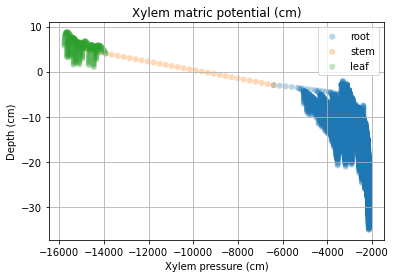

root -462.90127449891247
stem 0.0
leaves 462.9012745062885


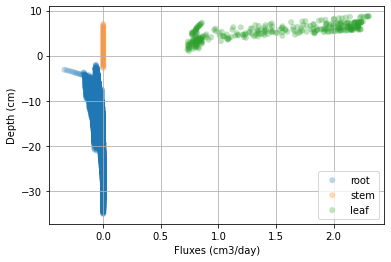

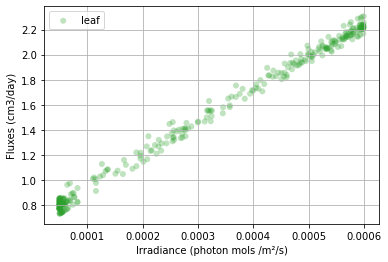

30 / 38
Incoming Light considered: 0.00065  photon mols /m²/s
0 [ 62.90990106  12.38281158  12.32907655  95.09653187 114.74568572
 119.94649865 125.7840949  129.08229742 133.39971137 132.74296892
 138.12186217 139.10474958 138.63441085 136.22784753 131.85542136
 126.77987213 116.97986027 112.1377738  101.28365015 100.92791747
  85.74035814  75.57900656  45.4963532   33.20456719  32.94803548
  27.25346551  12.24087003  12.18527344] 
 Mean 127.89517336119735 stdv 12.254918477697297
1 [ 12.38281158  12.32907655  95.09653187 114.74568572 119.94649865
 125.7840949  129.08229742 133.39971137 132.74296892 138.12186217
 139.10474958 138.63441085 136.22784753 131.85542136 126.77987213
 116.97986027 112.1377738  101.28365015 100.92791747  85.74035814
  75.57900656  45.4963532   33.20456719  32.94803548  27.25346551
  12.24087003  12.18527344  62.2370969 ] 
 Mean 130.53545171668085 stdv 7.325961246597906
2 [ 12.32907655  95.09653187 114.74568572 119.94649865 125.7840949
 129.08229742 133.39971137

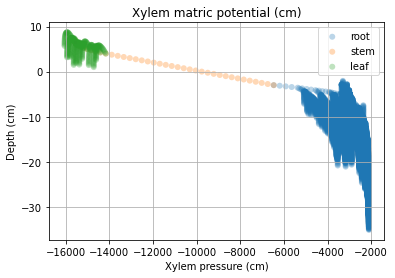

root -474.94577780153355
stem 0.0
leaves 474.945777809061


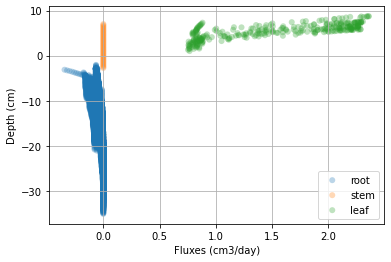

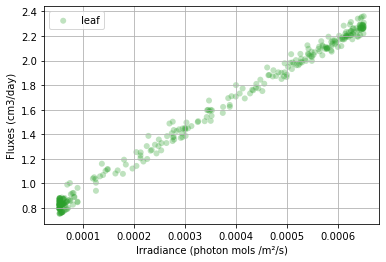

31 / 38
Incoming Light considered: 0.0007  photon mols /m²/s
0 [ 65.3891415   12.9521059   12.94854418  99.91409091 120.76417651
 126.49947268 132.86830773 136.54913991 141.26675589 140.74703147
 146.52709559 147.67967361 147.28941203 144.84860331 140.32140888
 135.03174996 124.72963334 119.6413979  108.16236742 107.80545933
  91.67541388  80.86098241  48.73917492  35.58793401  35.31523267
  29.21750884  13.12850549  13.06900998] 
 Mean 135.4395973755517 stdv 13.394197535209127
1 [ 12.9521059   12.94854418  99.91409091 120.76417651 126.49947268
 132.86830773 136.54913991 141.26675589 140.74703147 146.52709559
 147.67967361 147.28941203 144.84860331 140.32140888 135.03174996
 124.72963334 119.6413979  108.16236742 107.80545933  91.67541388
  80.86098241  48.73917492  35.58793401  35.31523267  29.21750884
  13.12850549  13.06900998  66.04506113] 
 Mean 138.36606896274643 stdv 8.104464972745836
2 [ 12.94854418  99.91409091 120.76417651 126.49947268 132.86830773
 136.54913991 141.26675589 

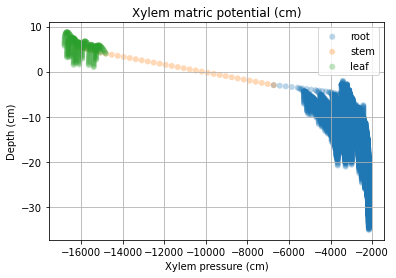

root -497.96374009029836
stem 0.0
leaves 497.96374009807147


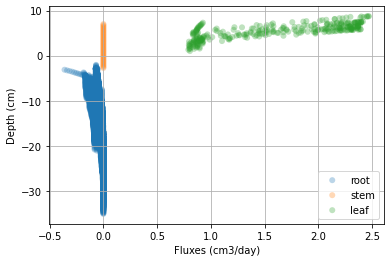

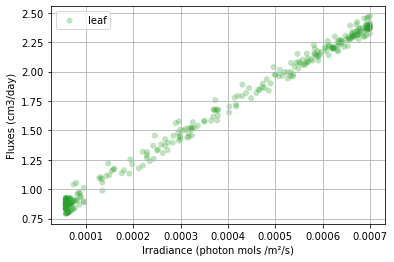

32 / 38
Incoming Light considered: 0.0007  photon mols /m²/s
0 [ 66.38372774  13.11671349  13.08579482 100.79594256 121.65169727
 127.27448358 133.54793609 137.13328875 141.77317781 141.17074165
 146.89841568 147.99558604 147.55622237 145.07161134 140.50579795
 135.18393493 124.85089682 119.74240698 108.24228896 107.87584578
  91.72891959  80.90373491  48.76285399  35.604049    35.33035298
  29.22951994  13.13376945  13.07419929] 
 Mean 135.94790842399138 stdv 13.18925323061143
1 [ 13.11671349  13.08579482 100.79594256 121.65169727 127.27448358
 133.54793609 137.13328875 141.77317781 141.17074165 146.89841568
 147.99558604 147.55622237 145.07161134 140.50579795 135.18393493
 124.85089682 119.74240698 108.24228896 107.87584578  91.72891959
  80.90373491  48.76285399  35.604049    35.33035298  29.22951994
  13.13376945  13.07419929  66.35074937] 
 Mean 138.81357445457567 stdv 7.9259871071713155
2 [ 13.08579482 100.79594256 121.65169727 127.27448358 133.54793609
 137.13328875 141.77317781

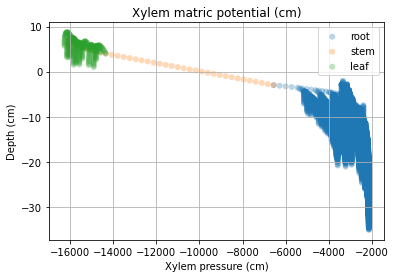

root -479.32899648422136
stem 0.0
leaves 479.32899649177733


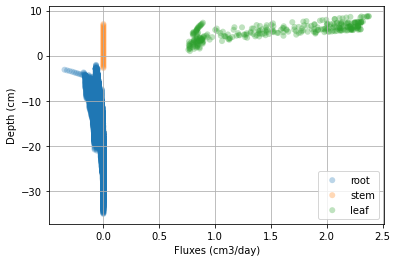

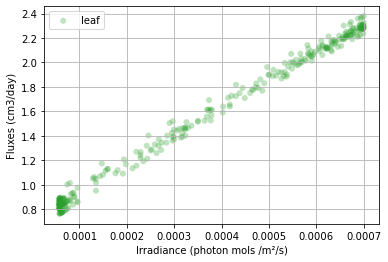

33 / 38
Incoming Light considered: 0.0007  photon mols /m²/s
0 [ 68.82925411  13.53582588  13.44816411 103.21424439 124.18386317
 129.57904399 135.65857005 139.03241853 143.50136736 142.69298559
 148.30734656 149.26582011 148.69693187 146.08877092 141.40578673
 135.98092872 125.53361202 120.35441262 108.76335452 108.36875472
  92.12984131  81.2445269   48.96219676  35.74617776  35.46884462
  29.34263816  13.18420754  13.12426067] 
 Mean 137.63559577365712 stdv 12.759646120468004
1 [ 13.53582588  13.44816411 103.21424439 124.18386317 129.57904399
 135.65857005 139.03241853 143.50136736 142.69298559 148.30734656
 149.26582011 148.69693187 146.08877092 141.40578673 135.98092872
 125.53361202 120.35441262 108.76335452 108.36875472  92.12984131
  81.2445269   48.96219676  35.74617776  35.46884462  29.34263816
  13.18420754  13.12426067  67.32232048] 
 Mean 140.3661528009542 stdv 7.539562439392615
2 [ 13.44816411 103.21424439 124.18386317 129.57904399 135.65857005
 139.03241853 143.50136736 

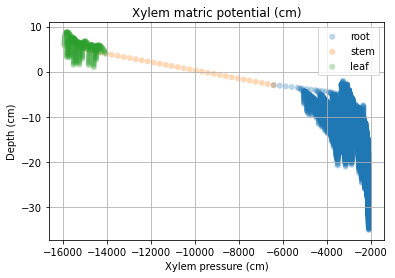

root -470.390474619145
stem 0.0
leaves 470.39047462651735


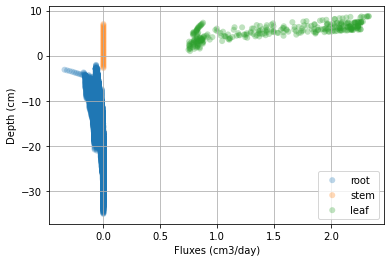

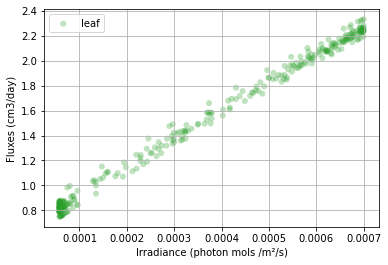

34 / 38
Incoming Light considered: 0.00075  photon mols /m²/s
0 [ 69.69519742  13.82725708  13.82621608 106.40915819 128.48500767
 134.55202457 141.2770226  145.16202822 150.13193854 149.59171255
 155.66910318 156.88291341 156.4767181  153.91681137 149.16096364
 143.59577979 132.73400123 127.36041276 115.21640992 114.83896629
  97.73348599  86.24383223  52.03999527  38.01141499  37.72044918
  31.21201643  14.0295616   13.96600216] 
 Mean 143.97628350347892 stdv 14.152329947731657
1 [ 13.82725708  13.82621608 106.40915819 128.48500767 134.55202457
 141.2770226  145.16202822 150.13193854 149.59171255 155.66910318
 156.88291341 156.4767181  153.91681137 149.16096364 143.59577979
 132.73400123 127.36041276 115.21640992 114.83896629  97.73348599
  86.24383223  52.03999527  38.01141499  37.72044918  31.21201643
  14.0295616   13.96600216  70.46007686] 
 Mean 147.07516863701477 stdv 8.549269584451595
2 [ 13.82621608 106.40915819 128.48500767 134.55202457 141.2770226
 145.16202822 150.13193854

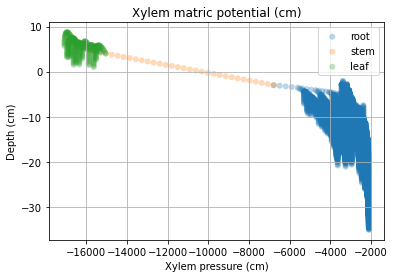

root -509.55569930095743
stem 0.0
leaves 509.5556993087487


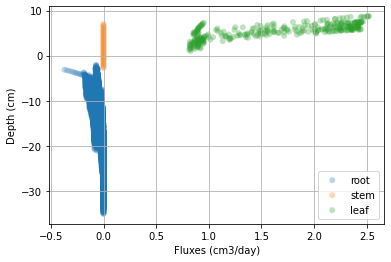

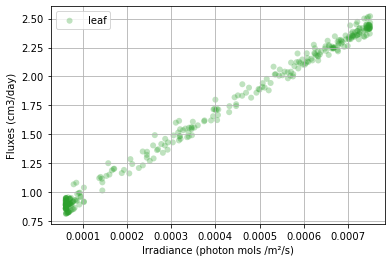

35 / 38
Incoming Light considered: 0.0008  photon mols /m²/s
0 [ 74.18218179  14.74108567  14.7410741  113.10519872 136.39715539
 142.78256185 149.84775508 153.92425763 159.130875   158.56749043
 164.92288153 166.19157804 165.76844904 163.09509785 158.12156631
 152.2919613  140.88706557 135.23322698 122.43076927 122.03249687
 103.94904929  91.77619098  55.445585    40.51462125  40.20480638
  33.27307597  14.96164553  14.89388323] 
 Mean 152.65457223875757 stdv 14.879899368400784
1 [ 14.74108567  14.7410741  113.10519872 136.39715539 142.78256185
 149.84775508 153.92425763 159.130875   158.56749043 164.92288153
 166.19157804 165.76844904 163.09509785 158.12156631 152.2919613
 140.88706557 135.23322698 122.43076927 122.03249687 103.94904929
  91.77619098  55.445585    40.51462125  40.20480638  33.27307597
  14.96164553  14.89388323  75.02010812] 
 Mean 155.92013578686638 stdv 8.967294930534782
2 [ 14.7410741  113.10519872 136.39715539 142.78256185 149.84775508
 153.92425763 159.130875   

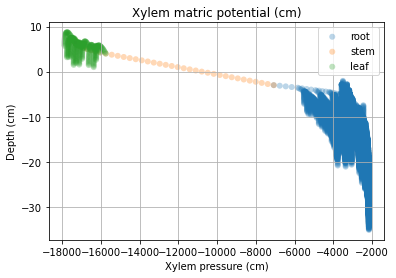

root -535.0006761159909
stem 0.0
leaves 535.0006761241475


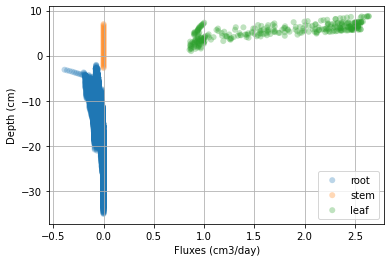

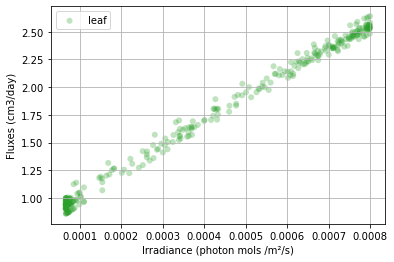

36 / 38
Incoming Light considered: 0.0008  photon mols /m²/s
0 [ 74.33883689  14.76844682  14.76844562 113.37531433 136.75395013
 143.16653248 150.2638096  154.35988367 159.59270482 159.02642782
 165.41559066 166.69131062 166.26583459 163.5778753  158.57824016
 152.71970699 141.26289144 135.58536569 122.73361389 122.33389656
 104.18964043  91.98043923  55.55744771  40.59369616  40.28322579
  33.33706613  14.98946305  14.92157155] 
 Mean 153.08895618188626 stdv 14.945342197666928
1 [ 14.76844682  14.76844562 113.37531433 136.75395013 143.16653248
 150.2638096  154.35988367 159.59270482 159.02642782 165.41559066
 166.69131062 166.26583459 163.5778753  158.57824016 152.71970699
 141.26289144 135.58536569 122.73361389 122.33389656 104.18964043
  91.98043923  55.55744771  40.59369616  40.28322579  33.33706613
  14.98946305  14.92157155  75.17912266] 
 Mean 156.367655570408 stdv 9.01075098943862
2 [ 14.76844562 113.37531433 136.75395013 143.16653248 150.2638096
 154.35988367 159.59270482 159

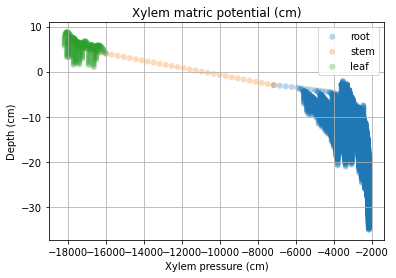

root -545.5645691724166
stem 0.0
leaves 545.5645691806212


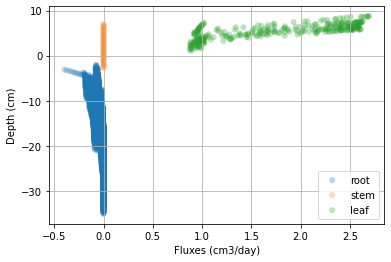

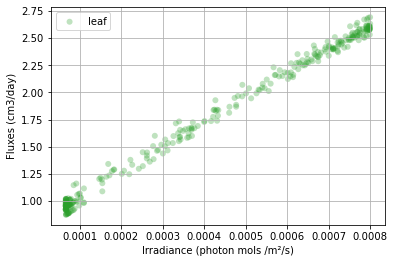

37 / 38
Incoming Light considered: 0.0008  photon mols /m²/s
0 [ 74.44772683  14.78821045  14.78821027 113.55669889 136.98799873
 143.41669086 150.53279011 154.64024445 159.88819933 159.32025181
 165.72877157 167.00849281 166.58167747 163.88537497 158.87074878
 152.99546711 141.50818977 135.81657375 122.93505692 122.53445709
 104.35250566  92.12019408  55.63617067  40.64989872  40.33897335
  33.38275121  15.00953093  14.94154694] 
 Mean 153.36816164898485 stdv 14.983937020771691
1 [ 14.78821045  14.78821027 113.55669889 136.98799873 143.41669086
 150.53279011 154.64024445 159.88819933 159.32025181 165.72877157
 167.00849281 166.58167747 163.88537497 158.87074878 152.99546711
 141.50818977 135.81657375 122.93505692 122.53445709 104.35250566
  92.12019408  55.63617067  40.64989872  40.33897335  33.38275121
  15.00953093  14.94154694  75.28944386] 
 Mean 156.65472566711477 stdv 9.035986947125132
2 [ 14.78821027 113.55669889 136.98799873 143.41669086 150.53279011
 154.64024445 159.88819933

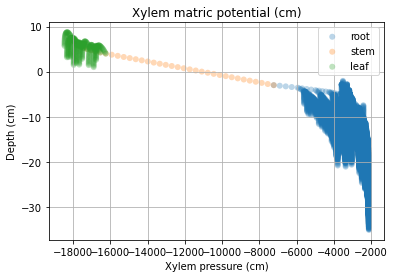

root -555.8311433108893
stem 0.0
leaves 555.8311433192036


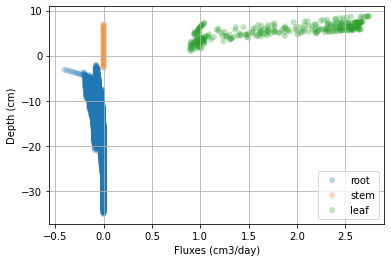

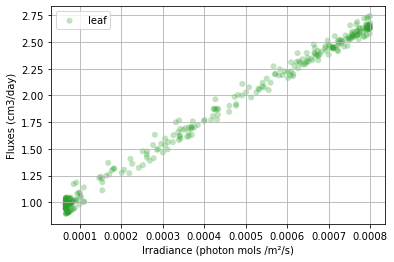

38 / 38
Incoming Light considered: 0.0008  photon mols /m²/s
0 [ 74.53217386  14.80312839  14.80312838 113.70066081 137.17676567
 143.61939313 150.75189852 154.86933317 160.13062791 159.56120359
 165.98688172 167.27016364 166.84215564 164.13843653 159.11053766
 153.22051282 141.7066719  136.00288704 123.09593272 122.69458452
 104.48100401  92.2296422   55.69662943  40.69276449  40.38148626
  33.4174863   15.02467779  14.9566236 ] 
 Mean 153.596504831701 stdv 15.017455861372985
1 [ 14.80312839  14.80312838 113.70066081 137.17676567 143.61939313
 150.75189852 154.86933317 160.13062791 159.56120359 165.98688172
 167.27016364 166.84215564 164.13843653 159.11053766 153.22051282
 141.7066719  136.00288704 123.09593272 122.69458452 104.48100401
  92.2296422   55.69662943  40.69276449  40.38148626  33.4174863
  15.02467779  14.9566236   75.37502584] 
 Mean 156.88982583275953 stdv 9.058141861981195
2 [ 14.80312838 113.70066081 137.17676567 143.61939313 150.75189852
 154.86933317 160.13062791 15

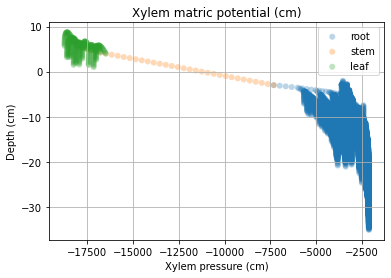

root -565.4596429067844
stem 0.0
leaves 565.4596429151811


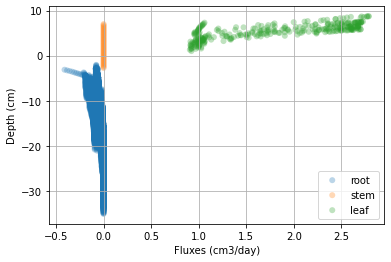

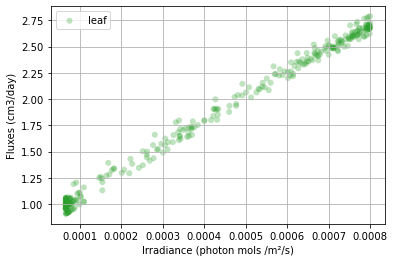

ValueError: x and y must have same first dimension, but have shapes (1,) and (38,)

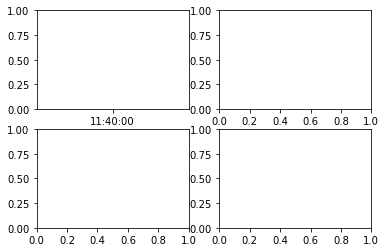

In [6]:
""" Example of the photosynthesis module, using real data from the Selhausen lysimeter setup
    from "example6h_photosynthesis_Selhausen.py" in tutorial/examples/python/

"""
import sys; sys.path.append("../../.."); sys.path.append("../../../src/python_modules")
from xylem_flux import XylemFluxPython  # Python hybrid solver
import Leuning
from importlib import reload
reload(Leuning)
import plantbox as pb
import vtk_plot as vp
import pandas as pd
from matplotlib.ticker import MaxNLocator
import numpy as np
import matplotlib.pyplot as plt
import csv

# """ Parameters """
# kz = 4.32e-1  # axial conductivity [cm^3/day] 
# kr = 1.728e-4  # radial conductivity of roots [1/day]
# kr_stem = 1.e-20  # radial conductivity of stem  [1/day], set to almost 0
# gmax =  0.004 #  cm3/day radial conductivity of leaves = stomatal conductivity [1/day]
# p_a =  -1000  #static air water potential 
# simtime = 14.0  # [day] for task b
# k_soil = []
plotResults = True
saveResults = True

#Sets the first and last values to go trough in the the below read file.
# t_init = 40
t_init = 70
# t_init = 90
# t_end = 75
t_end = 71
# t_end = 95


# # root system 
# pl = pb.MappedPlant() #pb.MappedRootSystem() #pb.MappedPlant()
# path = "../../../modelparameter/plant/" #"../../../modelparameter/rootsystem/" 
# name = "manyleaves" #"Anagallis_femina_Leitner_2010"  # Zea_mays_1_Leitner_2010
# pl.readParameters(path + name + ".xml")

# #load data
# df = pd.read_csv('../../../modelparameter/Selhausen_weather_data.txt', delimiter = "\t")

# """ soil """
# min_ = np.array([-5, -5, -15])
# max_ = np.array([9, 4, 0])
# res_ = np.array([5, 5, 5])
# pl.setRectangularGrid(pb.Vector3d(min_), pb.Vector3d(max_), pb.Vector3d(res_), True)  # cut and map segments


# pl.initialize()
# pl.simulate(simtime, False)

p_top = -1000  # top soil total potential [cm]
p_bot = -100 # bot total potential [cm]

" Coupling to soil "
z_ = np.linspace(0,-35,36) # 0, -1, -2, ... -35
mids_ = 0.5*(z_[:-1] + z_[1:]) # 35
p_s = np.linspace(p_top, p_bot, 35)
soil_index = lambda x,y,z : max(int(np.floor(-z)),-1) #abovegroud nodes get index -1
plant.setSoilGrid(soil_index)


r = Leuning.Leuning(plant) 
r.setKr([[kr],[kr_stem],[gmax]]) #gmax will be changed by the leuning function 
r.setKx([[kz]])
leaf_nodes = r.get_nodes_index(4)

# Numerical solution 
results=[]
resultsAn=[]
resultsgco2=[]
resultsVc=[]
resultsVj=[]
resultscics=[]
resultsfw=[]
resultspl=[]

#This will force input and go through all of the values. Keep in mind, this model requires a given amount to work.
#This base value is around 400 µmol photons/m²/s.
Forced_input = [130,150,150,150,175,175,200,250,250,250,275,300,300,300,300,300,325,400,400,450,500,550,550,600,600,600
              ,600,600,600,650,700,700,700,750,800,800,800,800,810,850,900,900,900,950,1000,1000
              ,1050,1070,1100,1150,1160,1200,1230,1250,1300,1300,1300,1350,1400,1400,1500,1600,1600,1700,1800]
for i in range(len(Forced_input)): #Forced input case
# for i in range(t_init, t_end): #Normal case
# if True:
#     i = t_init
    print(i+1, "/",len(Forced_input))
    Q_input = df['PAR'][i]
    RH_input = df['RH'][i]
    Tair_input = df['Tair'][i]
    p_s_input = df['ps'][i]
    N_input = 4.4 #nitrogen satisfaction for small wheat plants
    cs_input = df['co2'][i]
    
    Multiplier = Forced_input[i]/1000000 #Q_input
    print("Incoming Light considered:", Multiplier, " photon mols /m²/s")
    
    tempLighting = [0]*len(Lighting)
    for count, element in enumerate(Lighting):
        tempLighting[count] =  Multiplier * element 
        
    tempLighting = np.array(tempLighting)
    
    var = [tempLighting, RH_input, Tair_input, p_s_input, N_input, cs_input] #GTI Global Tilted Irradiance (each segment receives a different value based on their inclination)
#     var = [Q_input, RH_input, Tair_input, p_s_input, N_input, cs_input]      #Same value applied to each segment
    
    Rgaz=8.314 #J K-1 mol-1 = cm^3*MPa/K/mol
    rho_h2o = 1 #g/cm3
    Mh2o = 18.05 #g/mol
    MPa2hPa = 10000
    hPa2cm = 1.0197                  
    TairK = Tair_input + 273.15
    RH = RH_input
    p_a = np.log(RH)*Rgaz*rho_h2o*TairK/Mh2o *MPa2hPa*hPa2cm #air water potential [cm]
    r.airPressure = p_a
    
    
    es = 0.61078 * np.exp(17.27 * var[2] / (var[2] + 237.3)) # Source: FAO56
    ea = es * var[1]
    VPD = es - ea 
    r.Param['Patm']=df['Pair'][i]
    rx = r.solve_leuning( sim_time = simtime,sxx=[var[3]], cells = True, Qlight = var[0],VPD = VPD,Tl = var[2] + 273.15,p_linit = var[3],
    ci_init = var[5]*0.7, cs =var[5], soil_k = [], N = var[4], log = False, verbose = True)
    fluxes = r.radial_fluxes(simtime, rx, [var[3]], k_soil, True)  # cm3/day
    organTypes = np.array(r.rs.organTypes)  #cm³/jour
    results.append(sum(np.where(organTypes == 4, fluxes,0)))
    resultsAn.append(np.mean(r.An)*1e6)
#     for elem in r.An:
#         resultsAn.append(elem*1e6)
#     resultsAn.append((r.An)*1e6)
    resultsVc.append(np.mean(r.Vc)*1e6)
#     for elem in r.Vc:
#         resultsVc.append((elem)*1e6)
    resultsVj.append(np.mean(r.Vj)*1e6)
#     for elem in r.Vj:
#         resultsVj.append(elem*1e6)
    resultsgco2.append(np.mean(r.gco2))
#     for elem in r.gco2:
#         resultsgco2.append((elem))
    resultscics.append(np.mean(r.ci)/var[5])
#     for elem in ((r.ci)/var[5]):
#         resultscics.append(elem)
    resultsfw.append(np.mean(r.fw))
#     for elem in r.fw:
#         resultsfw.append(elem)
    resultspl.append(np.mean(r.x[leaf_nodes]))
#     for elem in r.x[leaf_nodes]:
#         resultspl.append(elem)
    

    
    #logs the size of the data vectors
#     print("resultsAn", len(resultsAn),"\n","resultsVc", len(resultsVc),"\n","resultsVj", len(resultsVj),"\n","resultsgco2", len(resultsgco2),"\n","resultscics", len(resultscics),"\n","resultsfw", len(resultsfw),"\n","resultspl", len(resultspl),"\n")
    
    
    '''
    #The following water fluxes is based on "example6f_xylemflux_leuning" in tutorial/examples/python/
    '''
    # plot results 
#     if False:
    if True:
        
        #Xylem pressure compared to height/depth
        nodes = r.get_nodes()
        fig, ax = plt.subplots()
        name = ["root", "stem", "leaf"]
        color = ['tab:blue', 'tab:orange', 'tab:green']
        for ndType in [2, 3, 4]:
            y = r.get_nodes_organ_type(ndType)#coordinates
            x = rx[r.get_nodes_index(ndType)]
            ax.scatter(x, y[:,2], c=color[ndType-2],  label=name[ndType-2],
                       alpha=0.3, edgecolors='none')

        ax.legend()
        ax.grid(True)
        plt.xlabel("Xylem pressure (cm)")
        plt.ylabel("Depth (cm)")
        plt.title("Xylem matric potential (cm)")
        plt.show()

        #Xylem water fluxes compared to height/depth
        fig, ax = plt.subplots()
        name = ["root", "stem", "leaf"]
        color = ['tab:blue', 'tab:orange', 'tab:green']
        for ndType in [2,3,4]:
            xList = []
            yList = []
            XSum = 0
            segIdx = r.get_segments_index(ndType)
            nodesy = segIdx + np.ones(segIdx.shape, dtype = np.int64)
            y = nodes[nodesy]#coordinates
            x = fluxes[segIdx]
            ax.scatter(x, y[:,2], c=color[ndType-2],  label=name[ndType-2],
                       alpha=0.3, edgecolors='none')
            #for out of python plotting
            for elem in x:
                xList.append(elem)
            for elem in y[:,2]:
                yList.append(elem)
            rows = zip(np.array(xList),np.array(yList))
            with open('WaterLateralFlux'+ name[ndType-2] + '.txt', "w") as f:
                writer = csv.writer(f)
                for row in rows:
                    writer.writerow(row)

            for elem in x:
                XSum = XSum +elem
            OrganTypeName = ["root", "stem", "leaves"]
            print(OrganTypeName[ndType-2],XSum)
            f.close()
        ax.legend()
        ax.grid(True)
        plt.xlabel("Fluxes (cm3/day)")
        plt.ylabel("Depth (cm)")
#         plt.title("water fluxes")
        plt.show()
        
        #Irradiance compared to water flux
        fig, ax = plt.subplots()
        name = ["root", "stem", "leaf"]
        color = ['tab:blue', 'tab:orange', 'tab:green']
        for ndType in [4]:
            xList = []
            yList = []
            XSum = 0
            segIdx = r.get_segments_index(ndType)
            nodesy = segIdx + np.ones(segIdx.shape, dtype = np.int64)
            y = nodes[nodesy]#coordinates
            x = fluxes[segIdx]
            ax.scatter(var[0],x, c=color[ndType-2],  label=name[ndType-2],
                       alpha=0.3, edgecolors='none')
        ax.legend()
        ax.grid(True)
        plt.xlabel("Irradiance (photon mols /m²/s)")
        plt.ylabel("Fluxes (cm3/day)")
#         plt.title("water fluxes")
        plt.show()
    
    
    
    
if saveResults:
    
    logfile = open('leuning6hE.txt', "w")
    for element in results:
        logfile.write(str(element))
        logfile.write("\n")
#     logfile.write(repr(results))
    logfile.close()
    logfile = open('leuning6hAn.txt', "w")
#     logfile.write(repr(resultsAn))
    for element in resultsAn:
        logfile.write(str(element))
        logfile.write("\n")
    logfile.close()
    logfile = open('leuning6hVc.txt', "w")
#     logfile.write(repr(resultsVc))
    for element in resultsVc:
        logfile.write(str(element))
        logfile.write("\n")
    logfile.close()
    logfile = open('leuning6hVj.txt', "w")
#     logfile.write(repr(resultsVj))
    for element in resultsVj:
        logfile.write(str(element))
        logfile.write("\n")
    logfile.close()
    logfile = open('leuning6hco2.txt', "w")
#     logfile.write(repr(resultsgco2))
    for element in resultsgco2:
        logfile.write(str(element))
        logfile.write("\n")
    logfile.close()
    logfile = open('leuning6hcics.txt', "w")
#     logfile.write(repr(resultscics))
    for element in resultscics:
        logfile.write(str(element))
        logfile.write("\n")
    logfile.close()
    logfile = open('leuning6hpl.txt', "w")
#     logfile.write(repr(resultspl))
    for element in resultspl:
        logfile.write(str(element))
        logfile.write("\n")
    logfile.close()
    logfile = open('leuning6hfw.txt', "w")
#     logfile.write(repr(resultsfw))
    for element in resultsfw:
        logfile.write(str(element))
        logfile.write("\n")
    logfile.close()












#Additional vtk plot
# ana = pb.SegmentAnalyser(r.rs)
# ana.addData("rx", rx)
# ana.addData("fluxes",fluxes)  # cut off for vizualisation
# ana.write("results/example_6f.vtp", ["radius", "surface", "rx", "fluxes"]) #
#vp.plot_roots(ana, "rx", "Xylem matric potential (cm)")  # "fluxes"





# if plotResults:
timePlot = df[t_init:t_end]['time']
# timePlot = t_init
fig, axs = plt.subplots(2,2)
axs[0, 0].plot(timePlot, resultsAn)
axs[0, 0].set(xlabel='', ylabel='mean An (μmol CO2 m-2 s-1)')
axs[0, 0].xaxis.set_major_locator(MaxNLocator(5))
axs[1, 0].plot(timePlot, resultsVc, 'tab:red')
axs[1, 0].set(xlabel='time', ylabel='mean Vc (μmol CO2 m-2 s-1)')
axs[1, 0].xaxis.set_major_locator(MaxNLocator(5))
axs[0, 1].plot(timePlot, resultsVj, 'tab:brown')
axs[0, 1].set(xlabel='', ylabel='mean Vj (μmol CO2 m-2 s-1)')
axs[0, 1].xaxis.set_major_locator(MaxNLocator(5))
axs[1, 1].plot(timePlot, resultsgco2, 'tab:brown')
axs[1, 1].set(xlabel='time', ylabel='mean gco2 (mol CO2 m-2 s-1)')
axs[1, 1].xaxis.set_major_locator(MaxNLocator(5))
fig.tight_layout(pad=3.0)
plt.show()
fig, axs = plt.subplots(2,2)
axs[0, 0].plot(timePlot, results)
axs[0, 0].set(xlabel='', ylabel='E')
axs[0, 0].xaxis.set_major_locator(MaxNLocator(5))
axs[0, 1].plot(timePlot, resultsfw, 'tab:brown')
axs[0, 1].set(xlabel='', ylabel='fw')
axs[0, 1].xaxis.set_major_locator(MaxNLocator(5))
axs[1, 0].plot(timePlot, resultspl, 'tab:brown')
axs[1, 0].set(xlabel='time', ylabel='pl')
axs[1, 0].xaxis.set_major_locator(MaxNLocator(5))
axs[1, 1].plot(timePlot, resultscics, 'tab:brown')
axs[1, 1].set(xlabel='time', ylabel='ci/cs (-)')
axs[1, 1].xaxis.set_major_locator(MaxNLocator(5))
fig.tight_layout(pad=3.0)
plt.show()


#Insert first line as header
results.insert(0, "leuning6hE")
resultsAn.insert(0,"leuning6hAn")
resultsVc.insert(0,"leuning6hVc")
resultsVj.insert(0,"leuning6hVj")
resultsgco2.insert(0,"leuning6hco2")
resultscics.insert(0,"leuning6hcics")
resultspl.insert(0,"leuning6hpl")
resultsfw.insert(0,"leuning6hfw")
rows = zip(results,resultsAn,resultsVc,resultsVj,resultsgco2,resultscics,resultspl,resultsfw)

with open('PhotosynthesisData.txt', "w") as f:
    writer = csv.writer(f)
    for row in rows:
        writer.writerow(row)
f.close()
